 # GRIP @ The Sparks Foundation  



# TASK 2 : Exploratory Data Analysis : RETAIL STORE

# PROBLEM STATEMENT : As a business manager, try to find out the weak areas where you can work to make more profit.  What all business problems you can derive by exploring the data?

DATASET LINK : https://bit.ly/3i4rbWl

In [3]:
# Importing libraries
library(dplyr)
library(tidyverse)
library(DT)
library(choroplethr)
library(choroplethrMaps)

In [4]:
# Import the dataset
Superstore= read.csv("SampleSuperstore.csv")
glimpse(Superstore)

Rows: 9,994
Columns: 13
$ Ship.Mode    <chr> "Second Class", "Second Class", "Second Class", "Standard~
$ Segment      <chr> "Consumer", "Consumer", "Corporate", "Consumer", "Consume~
$ Country      <chr> "United States", "United States", "United States", "Unite~
$ City         <chr> "Henderson", "Henderson", "Los Angeles", "Fort Lauderdale~
$ State        <chr> "Kentucky", "Kentucky", "California", "Florida", "Florida~
$ Postal.Code  <int> 42420, 42420, 90036, 33311, 33311, 90032, 90032, 90032, 9~
$ Region       <chr> "South", "South", "West", "South", "South", "West", "West~
$ Category     <chr> "Furniture", "Furniture", "Office Supplies", "Furniture",~
$ Sub.Category <chr> "Bookcases", "Chairs", "Labels", "Tables", "Storage", "Fu~
$ Sales        <dbl> 261.9600, 731.9400, 14.6200, 957.5775, 22.3680, 48.8600, ~
$ Quantity     <int> 2, 3, 2, 5, 2, 7, 4, 6, 3, 5, 9, 4, 3, 3, 5, 3, 6, 2, 2, ~
$ Discount     <dbl> 0.00, 0.00, 0.00, 0.45, 0.20, 0.00, 0.00, 0.20, 0.20, 0.0~
$ Profit       <

In [5]:
# To check if there are any missing values in the dataset
colSums(is.na(Superstore)) 

Ship.Mode      Segment      Country         City        State  Postal.Code 
           0            0            0            0            0            0 
      Region     Category Sub.Category        Sales     Quantity     Discount 
           0            0            0            0            0            0 
      Profit 
           0

In [6]:
# As there is no missing data , no cleaning of dataset is required.
# let us see the statistics of data
summary(Superstore)

  Ship.Mode           Segment            Country              City          
 Length:9994        Length:9994        Length:9994        Length:9994       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
    State            Postal.Code       Region            Category        
 Length:9994        Min.   : 1040   Length:9994        Length:9994       
 Class :character   1st Qu.:23223   Class :character   Class :character  
 Mode  :character   Median :56431   Mode  :character   Mode  :character  
                    Mean   :55190                                        
                    3rd Qu.:90008                                        
                 

# Statewise Sales Analysis

In [7]:
Statewise_Sales= Superstore %>%
  group_by(State) %>% 
  summarise(Total_Sales= sum(Sales)) %>%
  arrange(desc(Total_Sales))
datatable(Statewise_Sales)

HTML widgets cannot be represented in plain text (need html)

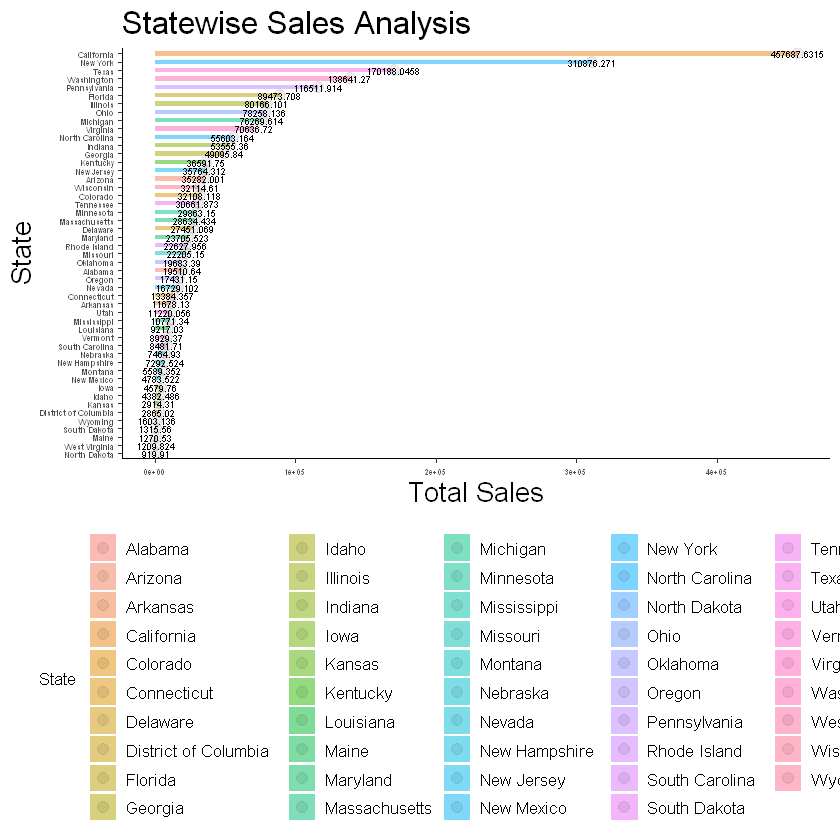

In [8]:
# Plotting Statewise Sales Analysis
ggplot(Statewise_Sales,aes(reorder(State,Total_Sales),Total_Sales,fill=State))+
  geom_col(width = 0.5, alpha = 0.5)+
  geom_point(size=3, color="black",alpha=0.07)+
  scale_x_discrete(labels = Statewise_Sales[order(Statewise_Sales$Total_Sales),]$State) +
  theme_classic()+
  coord_flip()+
  geom_text(aes(State,Total_Sales,label =Total_Sales),size = 2)+
  labs(x = "State", y = "Total Sales", title = "Statewise Sales Analysis")+
  theme(axis.text = element_text(size = 5, face = "bold"), title  =  element_text(size = 16))+
  theme(legend.title = element_text(size=10),legend.text = element_text(size=10),legend.position="bottom")

# Regionwise Sales Analysis

In [9]:
Regionwise_Sales= Superstore %>%
  group_by(Region) %>%
  summarise(TotalS= sum(Sales)) %>%
  arrange(desc(TotalS))
datatable(Regionwise_Sales)

HTML widgets cannot be represented in plain text (need html)

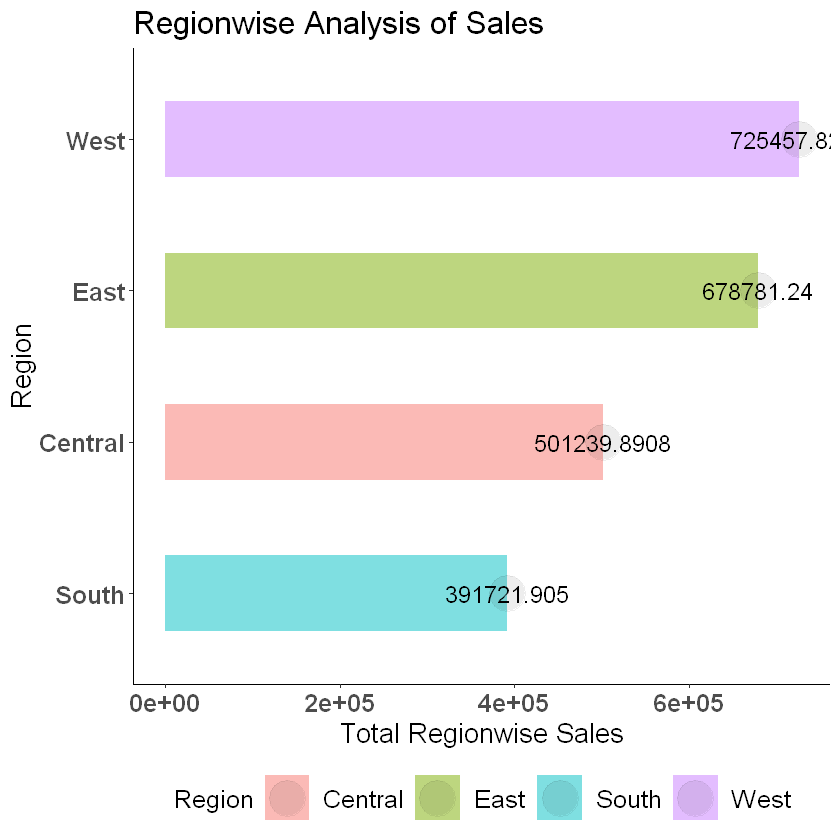

In [14]:
# Plotting Regionwise Sales Analysis
ggplot(Regionwise_Sales,aes(reorder(Region,TotalS),TotalS,fill=Region))+
  geom_col(width = 0.5, alpha = 0.5)+
  geom_point(size=10, color="black",alpha=0.07)+
  scale_x_discrete(labels = Regionwise_Sales[order(Regionwise_Sales$TotalS),]$Region) +
  theme_classic()+
  coord_flip()+
  geom_text(aes(Region,TotalS,label =TotalS), size = 5)+
  labs(x = "Region", y = "Total Regionwise Sales", title = "Regionwise Analysis of Sales",size = 15)+
  theme(axis.text = element_text(size = 15, face = "bold"), title  =  element_text(size = 16))+
  theme(legend.title = element_text(size=15),legend.text = element_text(size=15),legend.position="bottom")

# Geographic Plots of Statewise Sales Analysis 

In [15]:
GSPlot= Superstore %>%
  group_by(State) %>%
  summarise(Total_Sales= sum(Sales)) %>%
  arrange(desc(Total_Sales))
datatable(GSPlot)

HTML widgets cannot be represented in plain text (need html)

In [16]:
# Converting into a Geographic Plot
colnames(GSPlot)= c('region', 'value')
GSPlot$region= tolower(GSPlot$region)

we use here library(choroplethr) and library(choroplethrMaps) for map

Warning message in self$bind():
"The following regions were missing and are being set to NA: alaska, hawaii"


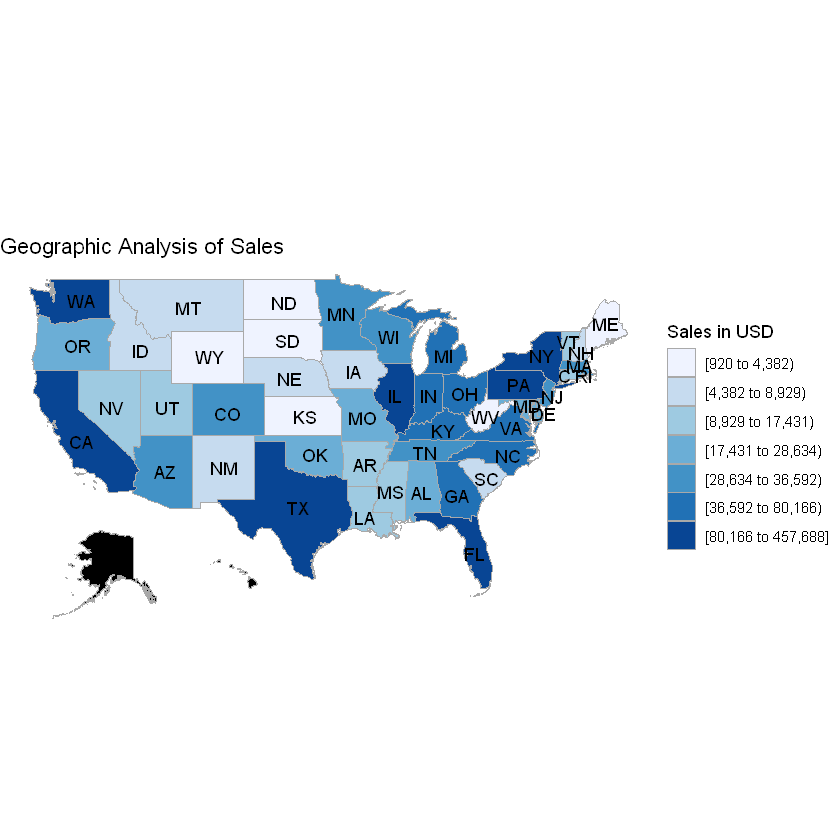

In [17]:
# Plots of Statewise Sales Analysis
state_choropleth(GSPlot,title= "Geographic Analysis of Sales",legend="Sales in USD")

# Profit Analysis

## Statewise Profit Analysis

In [18]:
Statewise_Profit= Superstore %>%
  group_by(State) %>% 
  summarise(Total_Profit= sum(Profit)) %>%
  arrange(desc(Total_Profit))
datatable(Statewise_Profit)

HTML widgets cannot be represented in plain text (need html)

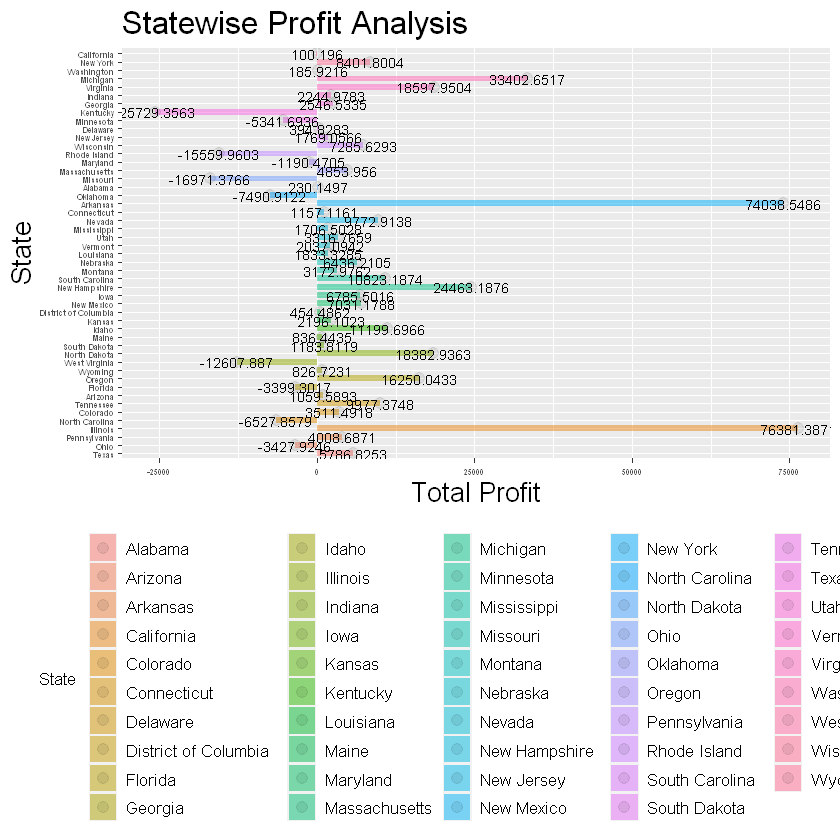

In [19]:
# Plotting Statewise Profit Analysis
ggplot(Statewise_Profit, aes(x=State,y=Total_Profit,fill= State)) +
  geom_col(width = 0.7, alpha = 0.5)+
  geom_point(size=3, color="black",alpha=0.07)+
  scale_x_discrete(labels = Statewise_Profit[order(Statewise_Profit$Total_Profit),]$State) +
  coord_flip()+
  geom_text(aes(State,Total_Profit,label =Total_Profit),size = 3)+
  labs(x = "State", y = "Total Profit", title = "Statewise Profit Analysis")+
  theme(axis.text = element_text(size = 5, face = "bold"), title  =  element_text(size = 16))+
  theme(legend.title = element_text(size=10),legend.text = element_text(size=10),legend.position="bottom")

# Regionwise Profit Analysis

In [20]:
Regionwise_Profit= Superstore %>%
  group_by(Region) %>%
  summarise(TotalP= sum(Profit)) %>%
  arrange(desc(TotalP))
datatable(Regionwise_Profit)

HTML widgets cannot be represented in plain text (need html)

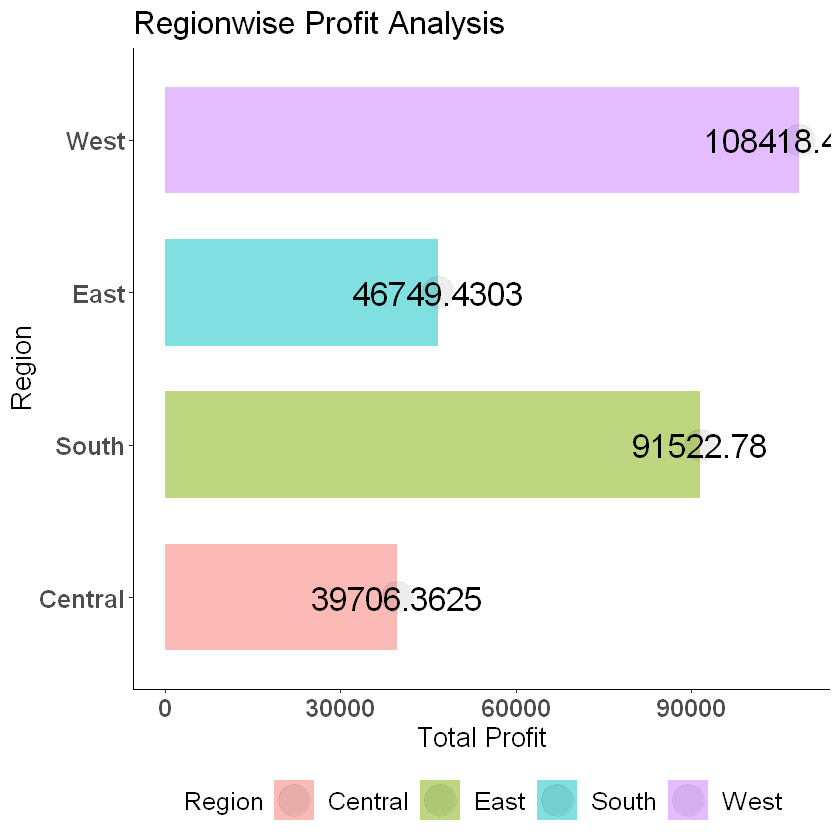

In [25]:
# Plotting Regionwise Profit Analysis
ggplot(Regionwise_Profit, aes(x=Region,y=TotalP,fill= Region)) +
  geom_col(width = 0.7, alpha = 0.5)+
  geom_point(size=9, color="black",alpha=0.07)+
  scale_x_discrete(labels = Regionwise_Profit[order(Regionwise_Profit$TotalP),]$Region) +
  theme_classic()+
  coord_flip()+
  geom_text(aes(Region,TotalP,label =TotalP), size = 7)+
  labs(x = "Region", y = "Total Profit", title = "Regionwise Profit Analysis")+
  theme(axis.text = element_text(size = 15, face = "bold"), title  =  element_text(size = 16))+
  theme(legend.title = element_text(size=15),legend.text = element_text(size=15),legend.position="bottom")

# Geographic Plots of Statewise Sales Analysis

In [26]:
GPPlot= Superstore %>%
  group_by(State) %>%
  summarise(Total_Profit= sum(Profit)) %>%
  arrange(desc(Total_Profit))
datatable(GPPlot)

HTML widgets cannot be represented in plain text (need html)

In [27]:
# Converting into a Geographic Plot
colnames(GPPlot)= c('region', 'value')
GPPlot$region= tolower(GPPlot$region)

Warning message in self$bind():
"The following regions were missing and are being set to NA: alaska, hawaii"


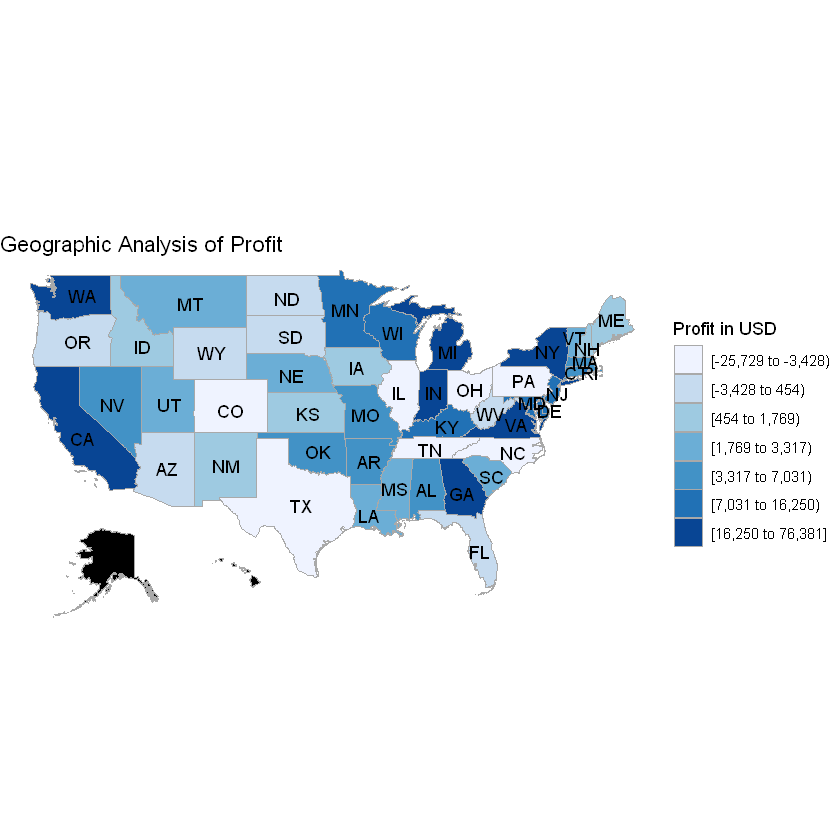

In [28]:
# Plotting Statewise Sales Analysis
state_choropleth(GPPlot,title= "Geographic Analysis of Profit",legend="Profit in USD")

## Observations
1. From the Statewise Profit Analysis, the States of New York, California and Washington recorded the most profits.
2. The State of Texas was the most unprofitable for the company causing severe losses.

# Performing some Statewise Profit/Sales Ratio Analysis

In [29]:
Profit_to_Sales= Superstore %>% 
  group_by(State) %>%
  summarise(Profit_Sales_Ratio= sum(Profit)/sum(Sales)) %>%
  arrange(desc(Profit_Sales_Ratio))
datatable(Profit_to_Sales)

HTML widgets cannot be represented in plain text (need html)

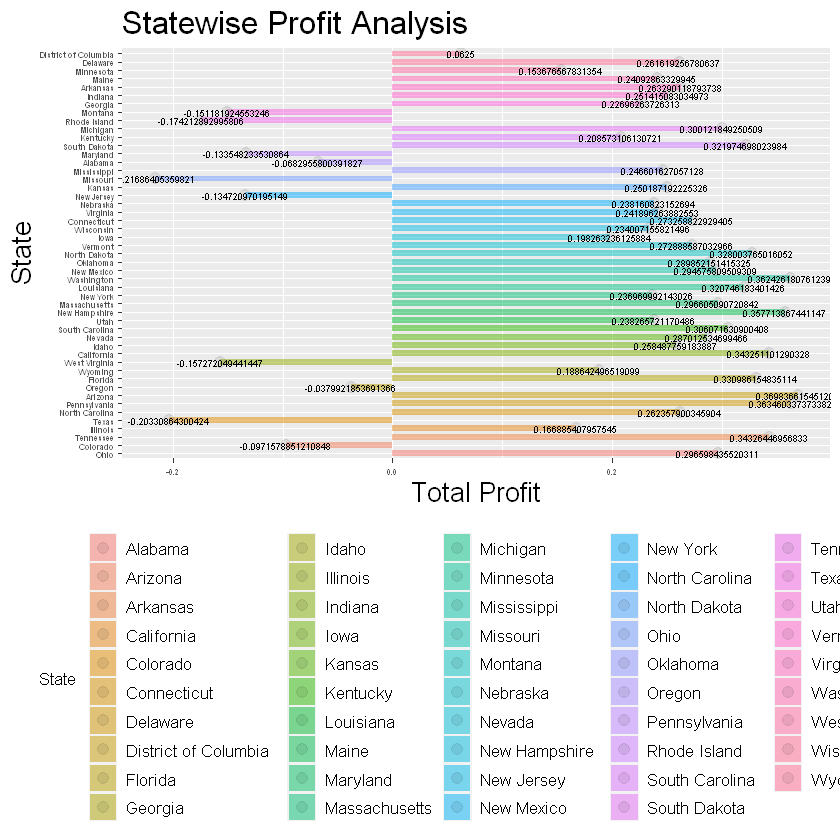

In [30]:
# Plotting Statewise Profit/Sales Ratio Analysis
ggplot(Profit_to_Sales, aes(x=State,y=Profit_Sales_Ratio,fill= State)) +
  geom_bar(stat = "identity",width = 0.7, alpha = 0.5)+
  geom_point(size=3, color="black",alpha=0.07)+
  scale_x_discrete(labels = Profit_to_Sales[order(Profit_to_Sales$Profit_Sales_Ratio),]$State) +
  coord_flip()+
  geom_text(aes(State,Profit_Sales_Ratio,label =Profit_Sales_Ratio), size = 2)+
  labs(x = "State", y = "Total Profit", title = "Statewise Profit Analysis")+
  theme(axis.text = element_text(size = 5, face = "bold"), title  =  element_text(size = 16))+
  theme(legend.title = element_text(size=10),legend.text = element_text(size=10),legend.position="bottom")

## Observations
1. Some Profit to Sales Ratio Analysis showed that Ohio had the worst Profit-Sales Ratio
2. We also understand that the states making the most profits, i.e, New York, California, and Washington do not show the maximum Profit-Sales ratio meaning that the company can improve its profits/sales in these states.

# Sales and Profit Analysis Segmentwise

In [31]:
Profit_each_segment= Superstore %>%
  group_by(Segment) %>%
  summarise(Ratio= sum(Profit)/sum(Sales))%>%
  arrange(desc(Ratio))
datatable(Profit_each_segment)

HTML widgets cannot be represented in plain text (need html)

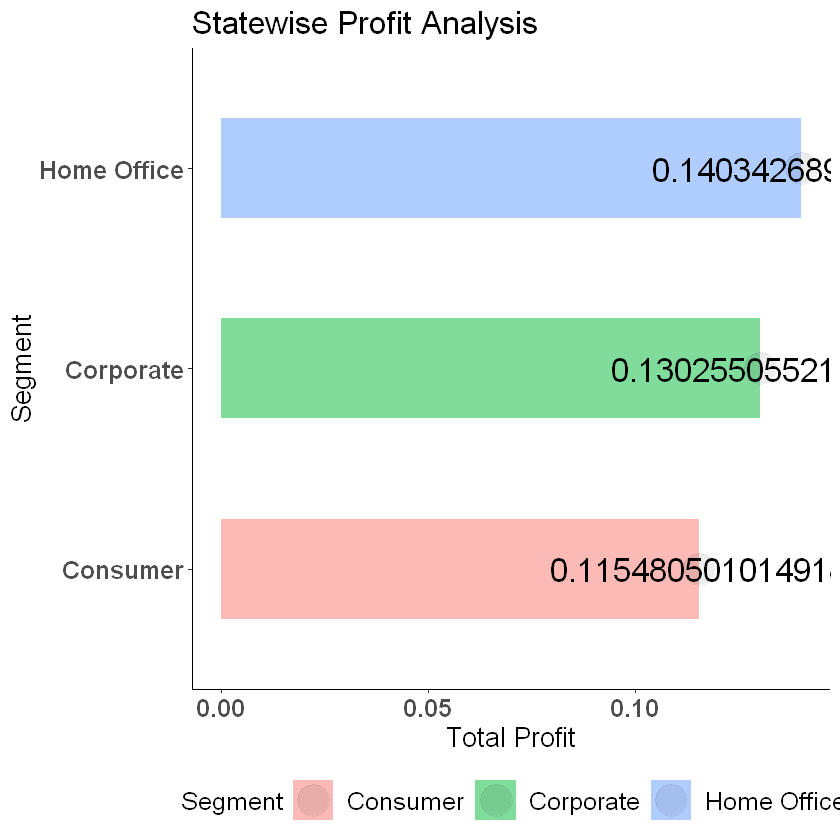

In [32]:
# plotting Profit/Sales Ratio Plots for each segment
ggplot(Profit_each_segment, aes(x=Segment,y=Ratio,fill= Segment)) +
  geom_col(width = 0.5, alpha = 0.5)+
  geom_point(size=9, color="black",alpha=0.07)+
  scale_x_discrete(labels = Profit_each_segment[order(Profit_each_segment$Ratio),]$Segment) +
  theme_classic()+
  coord_flip()+
  geom_text(aes(Segment,Ratio,label =Ratio),size = 7)+
  labs(x = "Segment", y = "Total Profit", title = "Statewise Profit Analysis")+
  theme(axis.text = element_text(size = 15, face = "bold"), title  =  element_text(size = 16))+
  theme(legend.title = element_text(size=15),legend.text = element_text(size=15),legend.position="bottom")

## Observations
1. For the Home Office Segment the Profit/Sales Ratio is the highest.
2. There is scope for the company to improve its Profit/Sales ratio in the Consumer and Corporate Segment.

We will choose the five different states and try to understand what kind of products are most profitable for our Analysis.
1. California
2. New Jersey
3. Connecticut
4. Wisconsin
5. Colorado

# Office-Supplies

## Profitable Office Supplies in California

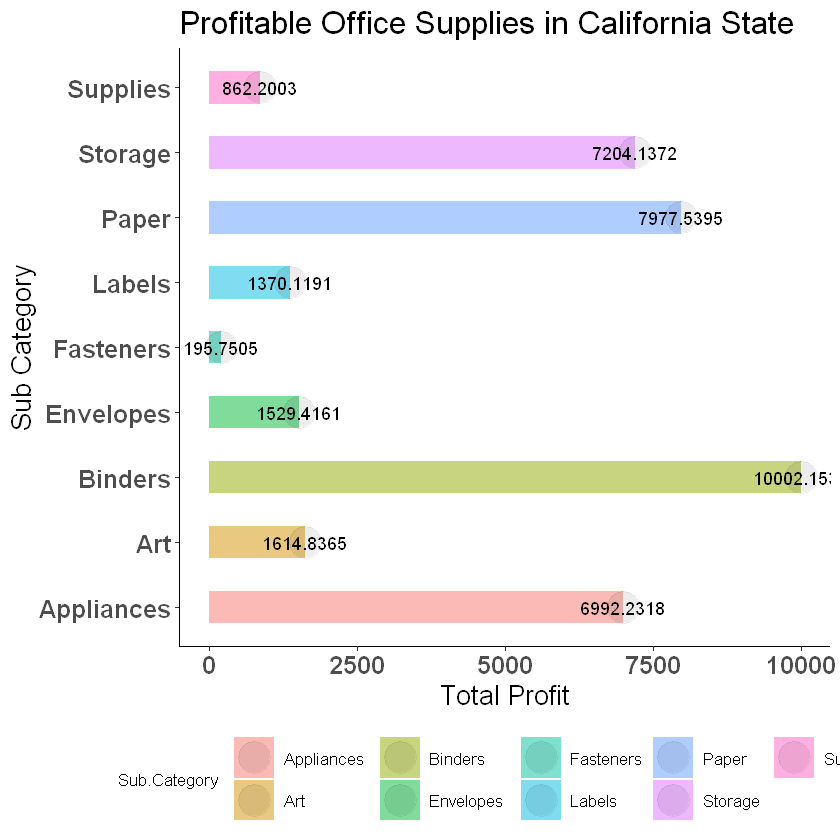

In [34]:
Superstore %>%
  group_by(Sub.Category) %>% 
  filter(Category== "Office Supplies" & State== "California" ) %>%
  summarise(Total_Profit= sum(Profit)) %>%
  ggplot(aes(x= Sub.Category,y=Total_Profit, fill= Sub.Category))+ 
  geom_col(width = 0.5, alpha = 0.5)+
  geom_point(size=9, color="black",alpha=0.07)+
  theme_classic()+
  coord_flip()+
  geom_text(aes(x= Sub.Category,y=Total_Profit,label =Total_Profit))+
  labs(x = "Sub Category", y = "Total Profit", title = "Profitable Office Supplies in California State")+
  theme(axis.text = element_text(size = 15, face = "bold"), title  =  element_text(size = 16))+
  theme(legend.title = element_text(size=10),legend.text = element_text(size=10),legend.position="bottom")

## Profitable Office Supplies in New Jersey 

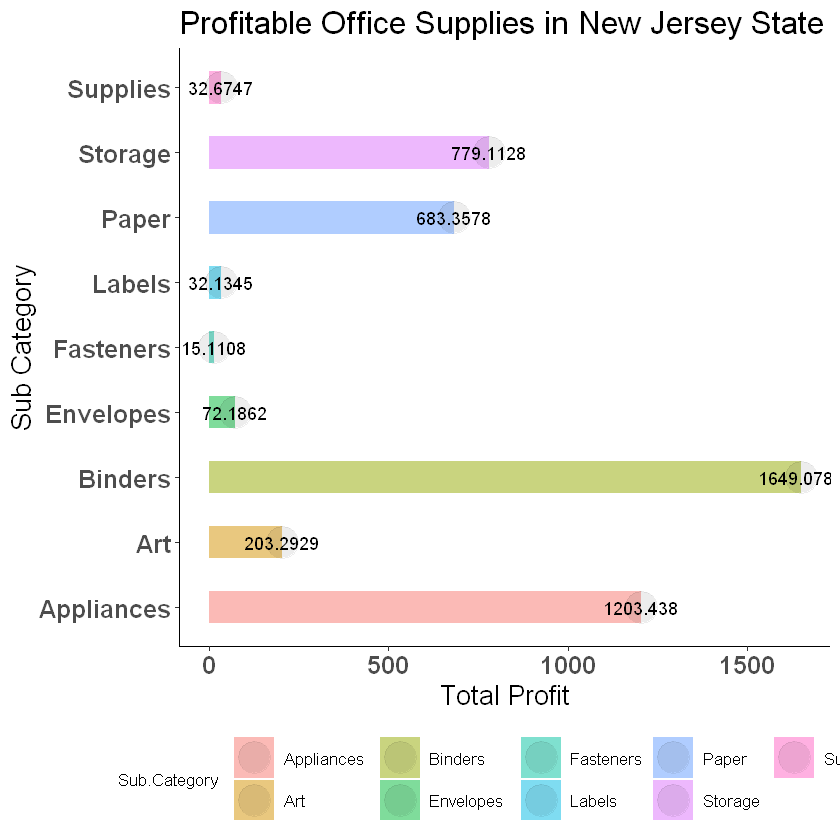

In [35]:
Superstore %>%
  group_by(Sub.Category) %>% 
  filter(Category== "Office Supplies" & State== "New Jersey" ) %>%
  summarise(Total_Profit= sum(Profit)) %>%
  ggplot(aes(x= Sub.Category,y=Total_Profit, fill= Sub.Category))+ 
  geom_col(width = 0.5, alpha = 0.5)+
  geom_point(size=9, color="black",alpha=0.07)+
  theme_classic()+
  coord_flip()+
  geom_text(aes(x= Sub.Category,y=Total_Profit,label =Total_Profit))+
  labs(x = "Sub Category", y = "Total Profit", title = "Profitable Office Supplies in New Jersey State")+
  theme(axis.text = element_text(size = 15, face = "bold"), title  =  element_text(size = 16))+
  theme(legend.title = element_text(size=10),legend.text = element_text(size=10),legend.position="bottom")

## Profitable Office Supplies in Connecticut 

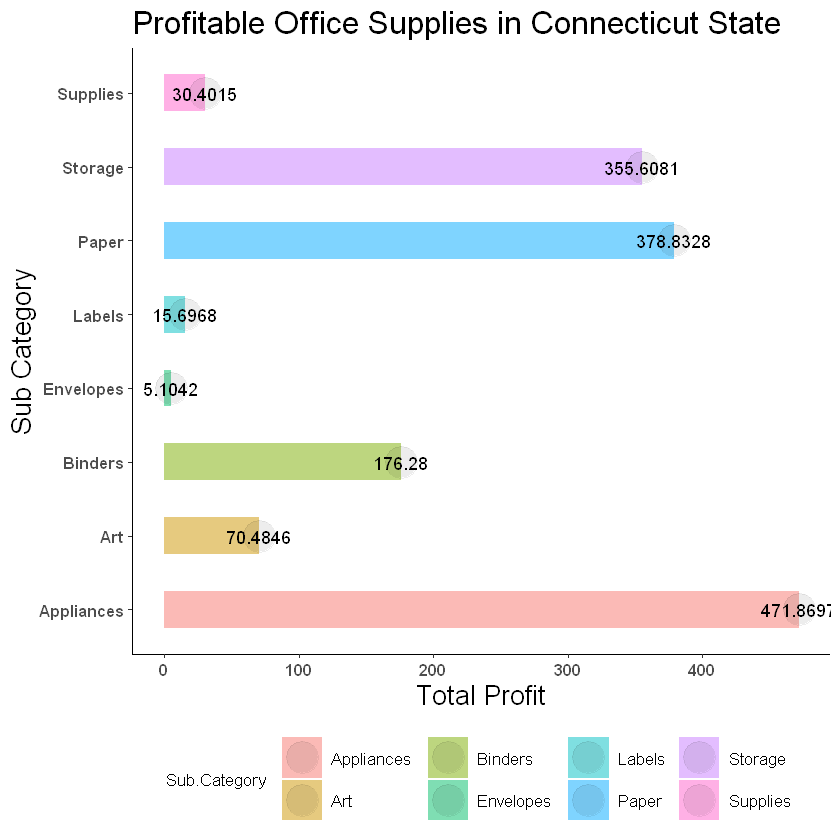

In [40]:
Superstore %>%
  group_by(Sub.Category) %>% 
  filter(Category== "Office Supplies" & State== "Connecticut" ) %>%
  summarise(Total_Profit= sum(Profit)) %>%
  ggplot(aes(x= Sub.Category,y=Total_Profit, fill= Sub.Category))+ 
  geom_col(width = 0.5, alpha = 0.5)+
  geom_point(size=9, color="black",alpha=0.07)+
  theme_classic()+
  coord_flip()+
  geom_text(aes(x= Sub.Category,y=Total_Profit,label =Total_Profit))+
  labs(x = "Sub Category", y = "Total Profit", title = "Profitable Office Supplies in Connecticut State")+
  theme(axis.text = element_text(size = 10, face = "bold"), title  =  element_text(size = 16))+
  theme(legend.title = element_text(size=10),legend.text = element_text(size=10),legend.position="bottom")

## Profitable Office Supplies in Wisconsin 

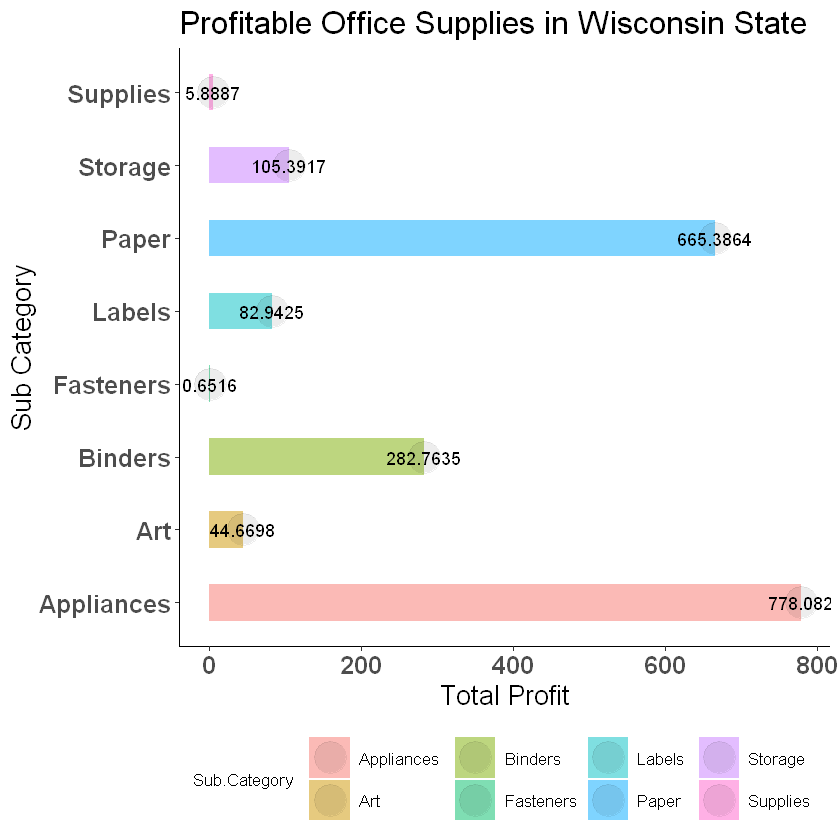

In [37]:
Superstore %>%
  group_by(Sub.Category) %>% 
  filter(Category== "Office Supplies" & State== "Wisconsin" ) %>%
  summarise(Total_Profit= sum(Profit)) %>%
  ggplot(aes(x= Sub.Category,y=Total_Profit, fill= Sub.Category))+ 
  geom_col(width = 0.5, alpha = 0.5)+
  geom_point(size=9, color="black",alpha=0.07)+
  theme_classic()+
  coord_flip()+
  geom_text(aes(x= Sub.Category,y=Total_Profit,label =Total_Profit))+
  labs(x = "Sub Category", y = "Total Profit", title = "Profitable Office Supplies in Wisconsin State")+
  theme(axis.text = element_text(size = 15, face = "bold"), title  =  element_text(size = 16))+
  theme(legend.title = element_text(size=10),legend.text = element_text(size=10),legend.position="bottom")

## Profitable Office Supplies in Colorado 

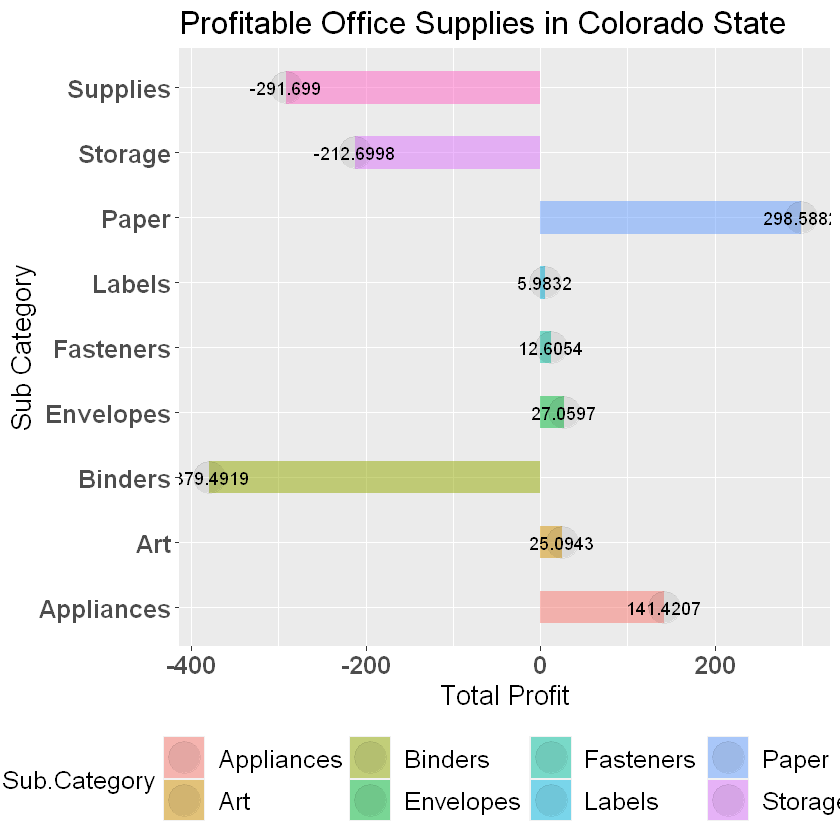

In [40]:
Superstore %>%
  group_by(Sub.Category) %>% 
  filter(Category== "Office Supplies" & State== "Colorado" ) %>%
  summarise(Total_Profit= sum(Profit)) %>%
  ggplot(aes(x= Sub.Category,y=Total_Profit, fill= Sub.Category))+ 
  geom_col(width = 0.5, alpha = 0.5)+
  geom_point(size=9, color="black",alpha=0.07)+
  coord_flip()+
  geom_text(aes(x= Sub.Category,y=Total_Profit,label =Total_Profit))+
  labs(x = "Sub Category", y = "Total Profit", title = "Profitable Office Supplies in Colorado State")+
  theme(axis.text = element_text(size = 15, face = "bold"), title  =  element_text(size = 16))+
  theme(legend.title = element_text(size=15),legend.text = element_text(size=15),legend.position="bottom")

### Similar graphs for Furniture and Technology Segment

# Furnitures 

## Profitable Furnitures in California 

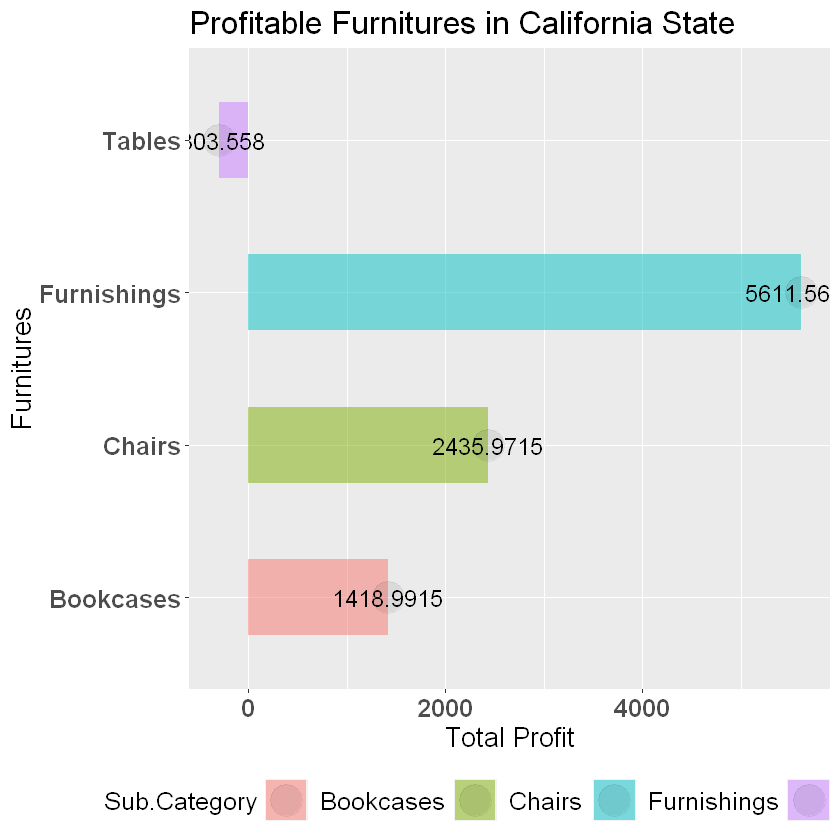

In [42]:
Superstore %>%
  group_by(Sub.Category) %>% 
  filter(Category== "Furniture" & State== "California") %>%
  summarise(Total_Profit= sum(Profit)) %>%
  ggplot(aes(x= Sub.Category,y=Total_Profit, fill= Sub.Category))+ 
  geom_col(width = 0.5, alpha = 0.5)+
  geom_point(size=9, color="black",alpha=0.07)+
  coord_flip()+
  geom_text(aes(x= Sub.Category,y=Total_Profit,label =Total_Profit),size = 5)+
  labs(x = "Furnitures", y = "Total Profit", title = "Profitable Furnitures in California State")+
  theme(axis.text = element_text(size = 15, face = "bold"), title  =  element_text(size = 16))+
  theme(legend.title = element_text(size=15),legend.text = element_text(size=15),legend.position="bottom")

## Profitable Furnitures in New Jersey

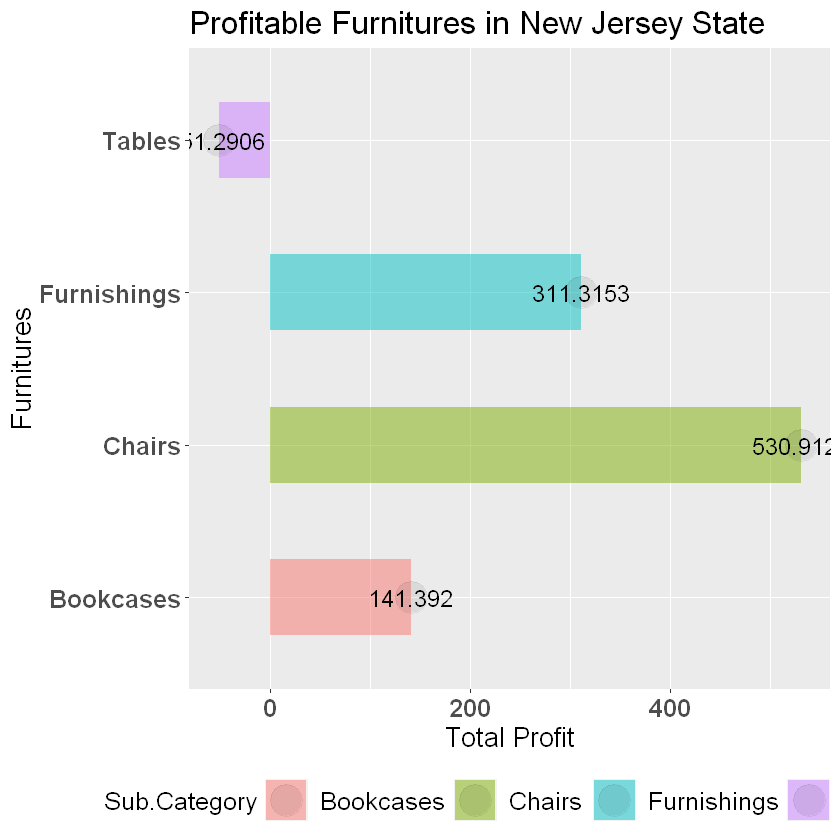

In [44]:
Superstore %>%
  group_by(Sub.Category) %>% 
  filter(Category== "Furniture" & State== "New Jersey") %>%
  summarise(Total_Profit= sum(Profit)) %>%
  ggplot(aes(x= Sub.Category,y=Total_Profit, fill= Sub.Category))+ 
  geom_col(width = 0.5, alpha = 0.5)+
  geom_point(size=9, color="black",alpha=0.07)+
  coord_flip()+
  geom_text(aes(x= Sub.Category,y=Total_Profit,label =Total_Profit), size = 5)+
  labs(x = "Furnitures", y = "Total Profit", title = "Profitable Furnitures in New Jersey State")+
  theme(axis.text = element_text(size = 15, face = "bold"), title  =  element_text(size = 16))+
  theme(legend.title = element_text(size=15),legend.text = element_text(size=15),legend.position="bottom")

## Profitable Furnitures in Connecticut 

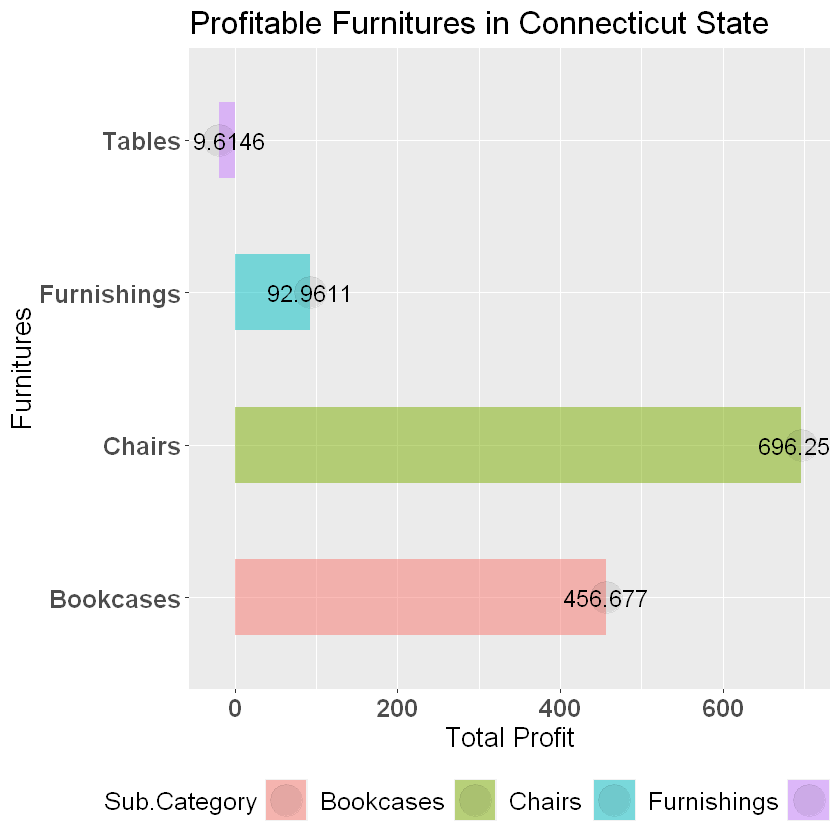

In [45]:
Superstore %>%
  group_by(Sub.Category) %>% 
  filter(Category== "Furniture" & State== "Connecticut") %>%
  summarise(Total_Profit= sum(Profit)) %>%
  ggplot(aes(x= Sub.Category,y=Total_Profit, fill= Sub.Category))+ 
  geom_col(width = 0.5, alpha = 0.5)+
  geom_point(size=9, color="black",alpha=0.07)+
  coord_flip()+
  geom_text(aes(x= Sub.Category,y=Total_Profit,label =Total_Profit), size = 5)+
  labs(x = "Furnitures", y = "Total Profit", title = "Profitable Furnitures in Connecticut State")+
  theme(axis.text = element_text(size = 15, face = "bold"), title  =  element_text(size = 16))+
  theme(legend.title = element_text(size=15),legend.text = element_text(size=15),legend.position="bottom")

## Profitable Furnitures in Wisconsin 

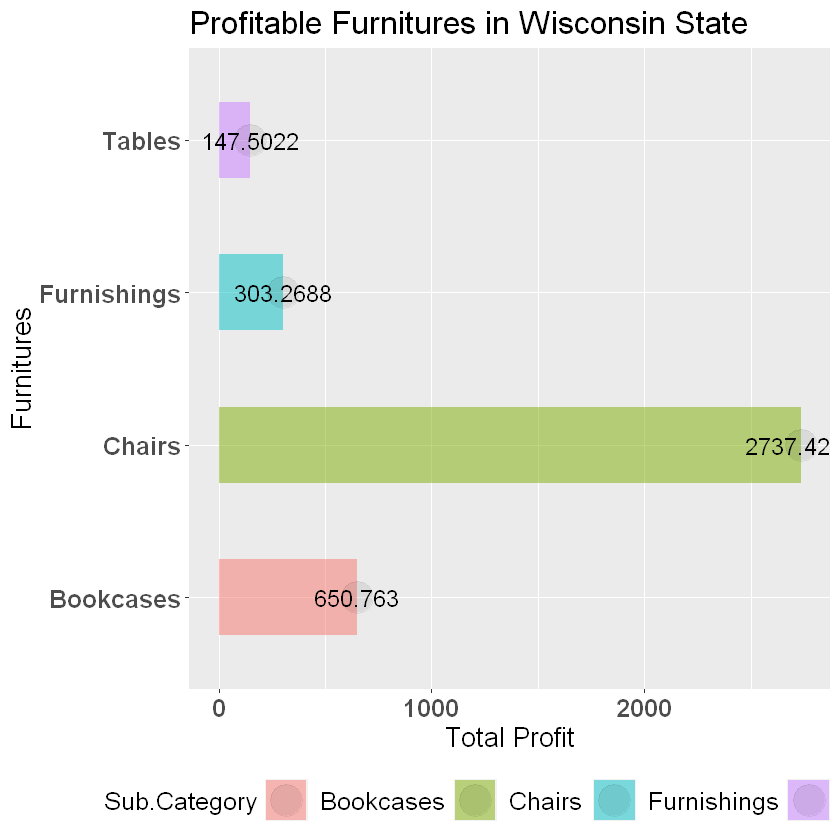

In [46]:
Superstore %>%
  group_by(Sub.Category) %>% 
  filter(Category== "Furniture" & State== "Wisconsin") %>%
  summarise(Total_Profit= sum(Profit)) %>%
  ggplot(aes(x= Sub.Category,y=Total_Profit, fill= Sub.Category))+ 
  geom_col(width = 0.5, alpha = 0.5)+
  geom_point(size=9, color="black",alpha=0.07)+
  coord_flip()+
  geom_text(aes(x= Sub.Category,y=Total_Profit,label =Total_Profit),size = 5)+
  labs(x = "Furnitures", y = "Total Profit", title = "Profitable Furnitures in Wisconsin State")+
  theme(axis.text = element_text(size = 15, face = "bold"), title  =  element_text(size = 16))+
  theme(legend.title = element_text(size=15),legend.text = element_text(size=15),legend.position="bottom")

##  Profitable Furnitures in Colorado

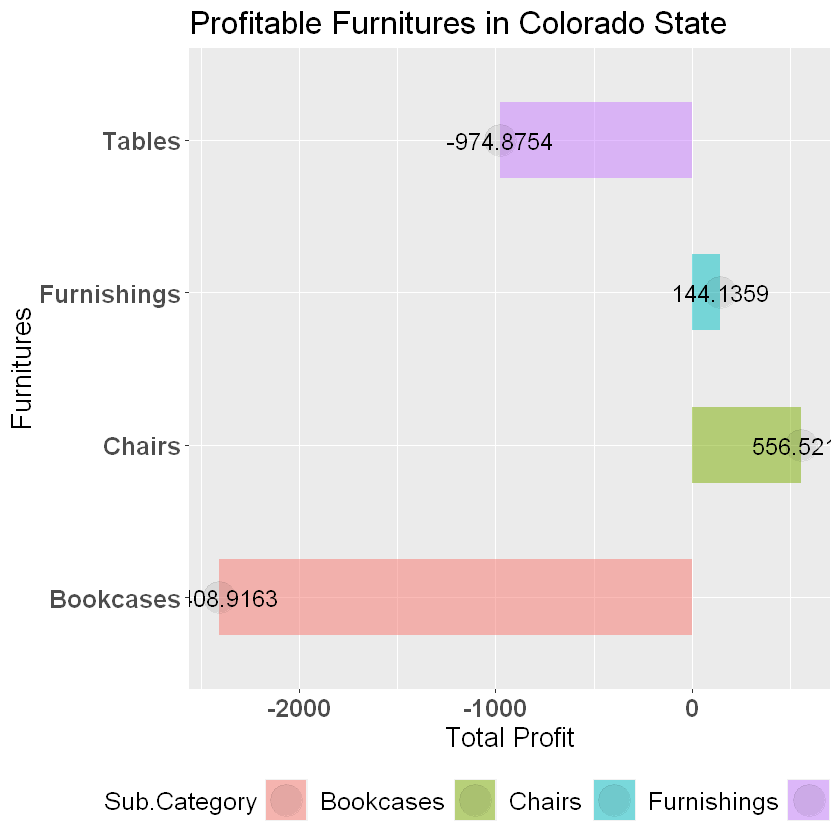

In [47]:
Superstore %>%
  group_by(Sub.Category) %>% 
  filter(Category== "Furniture" & State== "Colorado") %>%
  summarise(Total_Profit= sum(Profit)) %>%
  ggplot(aes(x= Sub.Category,y=Total_Profit, fill= Sub.Category))+ 
  geom_col(width = 0.5, alpha = 0.5)+
  geom_point(size=9, color="black",alpha=0.07)+
  coord_flip()+
  geom_text(aes(x= Sub.Category,y=Total_Profit,label =Total_Profit),size = 5)+
  labs(x = "Furnitures", y = "Total Profit", title = "Profitable Furnitures in Colorado State")+
  theme(axis.text = element_text(size = 15, face = "bold"), title  =  element_text(size = 16))+
  theme(legend.title = element_text(size=15),legend.text = element_text(size=15),legend.position="bottom")

# Technology

## Profitable Technology in California 

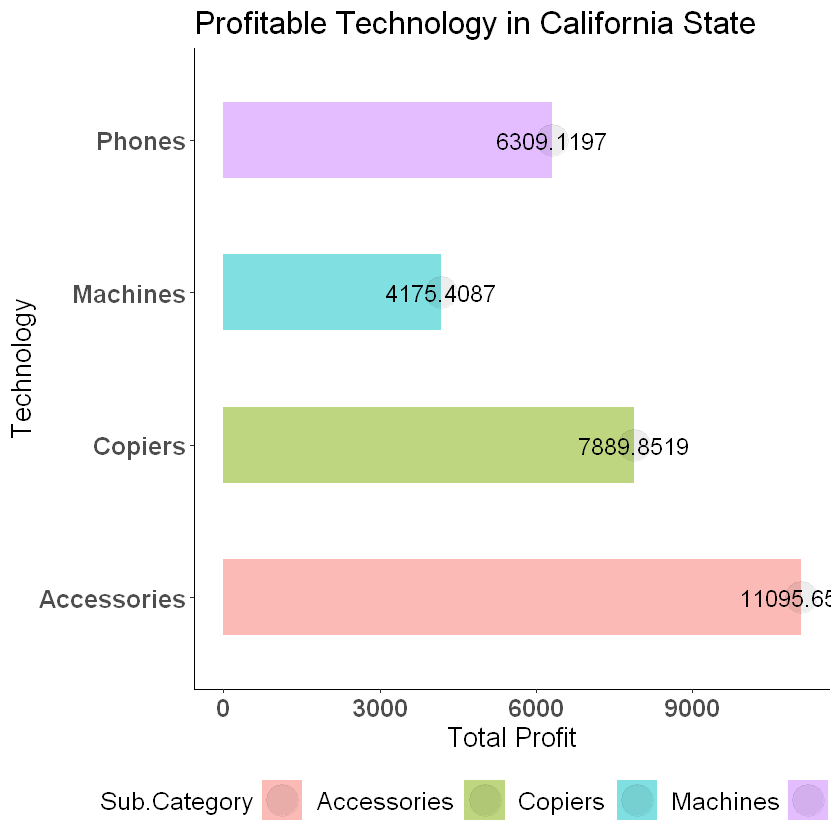

In [48]:
Superstore %>%
  group_by(Sub.Category) %>% 
  filter(Category== "Technology" & State== "California") %>%
  summarise(Total_Profit= sum(Profit)) %>%
  ggplot(aes(x= Sub.Category,y=Total_Profit, fill= Sub.Category))+ 
  geom_col(width = 0.5, alpha = 0.5)+
  geom_point(size=9, color="black",alpha=0.07)+
  theme_classic()+
  coord_flip()+
  geom_text(aes(x= Sub.Category,y=Total_Profit,label =Total_Profit),size = 5)+
  labs(x = "Technology", y = "Total Profit", title = "Profitable Technology in California State")+
  theme(axis.text = element_text(size = 15, face = "bold"), title  =  element_text(size = 16))+
  theme(legend.title = element_text(size=15),legend.text = element_text(size=15),legend.position="bottom")

## Profitable Technology in New Jersey 

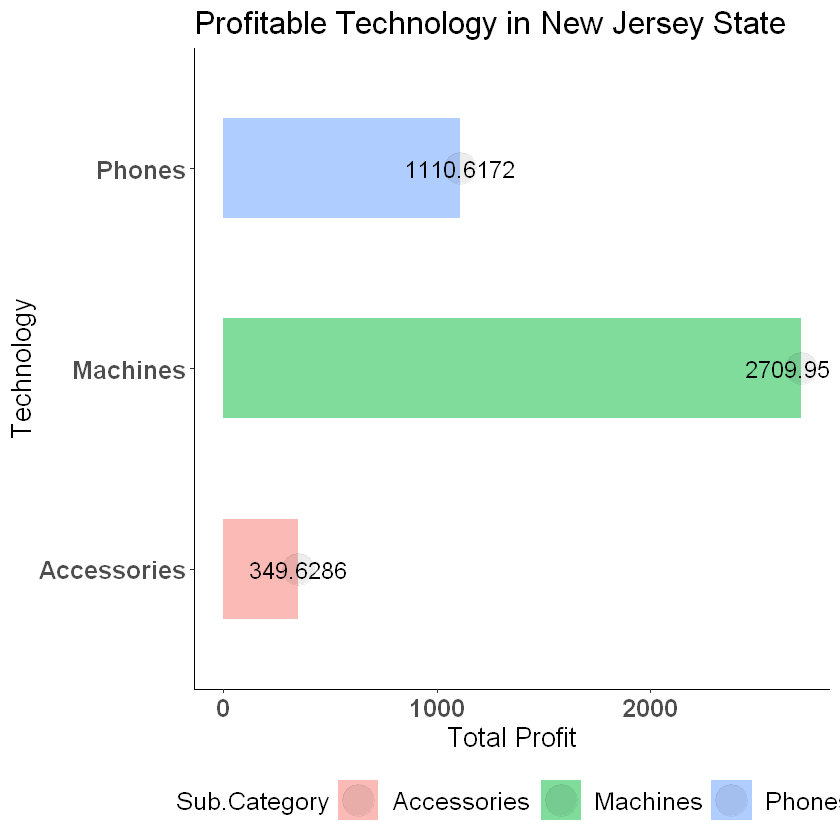

In [49]:
Superstore %>%
  group_by(Sub.Category) %>% 
  filter(Category== "Technology" & State== "New Jersey") %>%
  summarise(Total_Profit= sum(Profit)) %>%
  ggplot(aes(x= Sub.Category,y=Total_Profit, fill= Sub.Category))+ 
  geom_col(width = 0.5, alpha = 0.5)+
  geom_point(size=9, color="black",alpha=0.07)+
  theme_classic()+
  coord_flip()+
  geom_text(aes(x= Sub.Category,y=Total_Profit,label =Total_Profit),size = 5)+
  labs(x = "Technology", y = "Total Profit", title = "Profitable Technology in New Jersey State")+
  theme(axis.text = element_text(size = 15, face = "bold"), title  =  element_text(size = 16))+
  theme(legend.title = element_text(size=15),legend.text = element_text(size=15),legend.position="bottom")

## Profitable Technology in Connecticut 

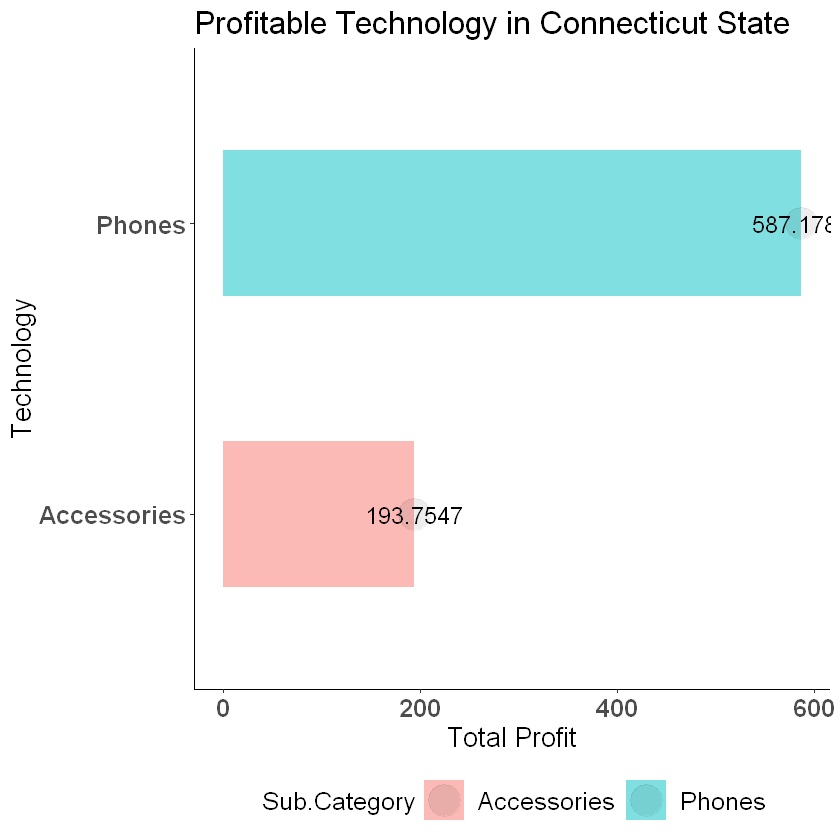

In [50]:
Superstore %>%
  group_by(Sub.Category) %>% 
  filter(Category== "Technology" & State== "Connecticut") %>%
  summarise(Total_Profit= sum(Profit)) %>%
  ggplot(aes(x= Sub.Category,y=Total_Profit, fill= Sub.Category))+ 
  geom_col(width = 0.5, alpha = 0.5)+
  geom_point(size=9, color="black",alpha=0.07)+
  theme_classic()+
  coord_flip()+
  geom_text(aes(x= Sub.Category,y=Total_Profit,label =Total_Profit),size = 5)+
  labs(x = "Technology", y = "Total Profit", title = "Profitable Technology in Connecticut State")+
  theme(axis.text = element_text(size = 15, face = "bold"), title  =  element_text(size = 16))+
  theme(legend.title = element_text(size=15),legend.text = element_text(size=15),legend.position="bottom")

## Profitable Technology in Wisconsin 

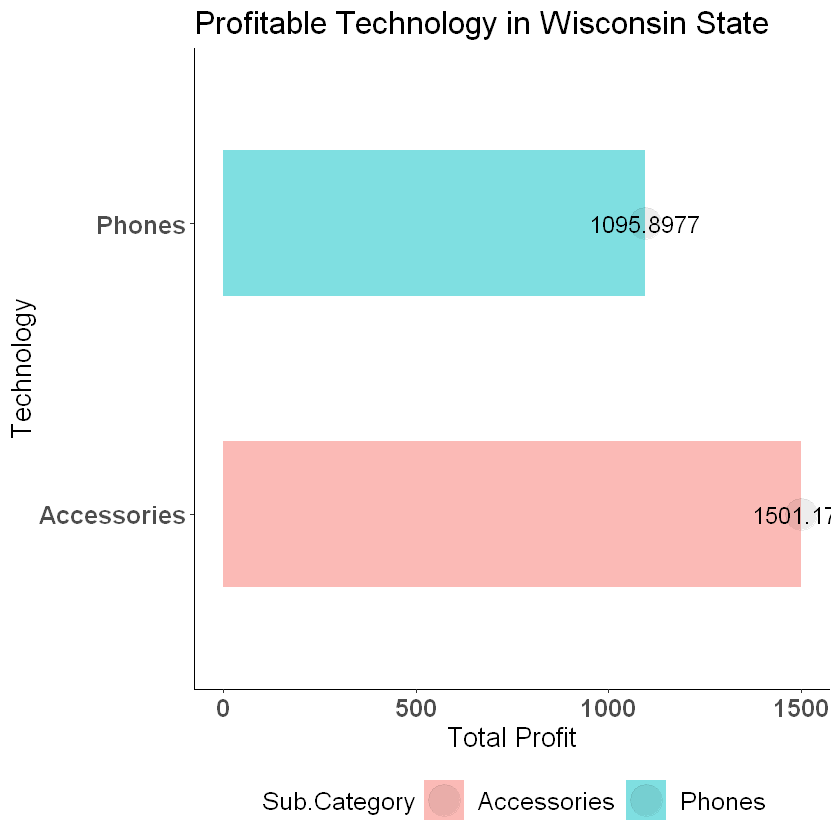

In [51]:
Superstore %>%
  group_by(Sub.Category) %>% 
  filter(Category== "Technology" & State== "Wisconsin") %>%
  summarise(Total_Profit= sum(Profit)) %>%
  ggplot(aes(x= Sub.Category,y=Total_Profit, fill= Sub.Category))+ 
  geom_col(width = 0.5, alpha = 0.5)+
  geom_point(size=9, color="black",alpha=0.07)+
  theme_classic()+
  coord_flip()+
  geom_text(aes(x= Sub.Category,y=Total_Profit,label =Total_Profit),size = 5)+
  labs(x = "Technology", y = "Total Profit", title = "Profitable Technology in Wisconsin State")+
  theme(axis.text = element_text(size = 15, face = "bold"), title  =  element_text(size = 16))+
  theme(legend.title = element_text(size=15),legend.text = element_text(size=15),legend.position="bottom")

## Profitable Technology in Colorado 

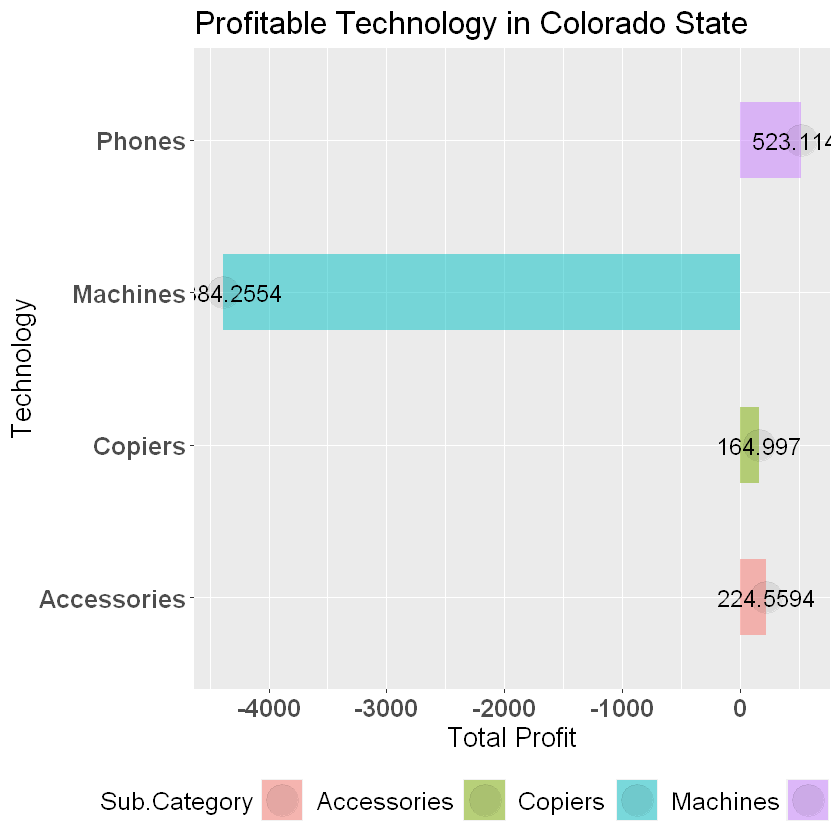

In [52]:
Superstore %>%
  group_by(Sub.Category) %>% 
  filter(Category== "Technology" & State== "Colorado") %>%
  summarise(Total_Profit= sum(Profit)) %>%
  ggplot(aes(x= Sub.Category,y=Total_Profit, fill= Sub.Category))+ 
  geom_col(width = 0.5, alpha = 0.5)+
  geom_point(size=9, color="black",alpha=0.07)+
  coord_flip()+
  geom_text(aes(x= Sub.Category,y=Total_Profit,label =Total_Profit),size = 5)+
  labs(x = "Technology", y = "Total Profit", title = "Profitable Technology in Colorado State")+
  theme(axis.text = element_text(size = 15, face = "bold"), title  =  element_text(size = 16))+
  theme(legend.title = element_text(size=15),legend.text = element_text(size=15),legend.position="bottom")


## Observations
1. In the State of California, in the Office Supplies segment,Binders and Paper are some of the most profitable products.In the Furniture Segment,Furnishings are the most profitable, whereas tables are a little un-profitable.In the technology segment, Accessories and Copiers are the most profitable products.
2. In New Jersey, in the Office Supplies segment, most profit comes from the Binders.In the Furniture Segment, Chairs are the most profitable with Tables accounting for loss.In the Technology segment, Machines are the most profitable products.
3. In the state of Connecticut, Appliances, Paper and Storage are the most profitable.Chairs being most profitable in the Furniture Segment, whereas phones are the most profitable in the Technology Segment.
4. In Winconsin, Appliances and Paper are the most profitable, in the Office-Supplies Segment, Chairs are most profitable in Furniture Segment, and Accessories are the most profitable in the Technology Segment. 
5. In the State if Colorado, Binders, Supplies and Storage contribute to loss in the Office Supplies Segment, whereas Bookcases and tables account for losses in the Furniture Segment. Machines incur huge losses to the company in the state of Colorado.

# Different Sub-Categories

## Price per product in different Sub-Categories 

In [53]:
List=list()
a=0
for (j in Superstore) {
  a= (Superstore$Sales)/(Superstore$Quantity)
  List[[length(List)+1]]=a
}
Superstore=Superstore %>% mutate(Price_per_product=as.integer(paste(a)))

product_price=Superstore %>%
  group_by(Sub.Category) %>%
  summarise(Total_Profit= sum(Price_per_product))%>%
  arrange(desc(Total_Profit))
datatable(product_price)

HTML widgets cannot be represented in plain text (need html)

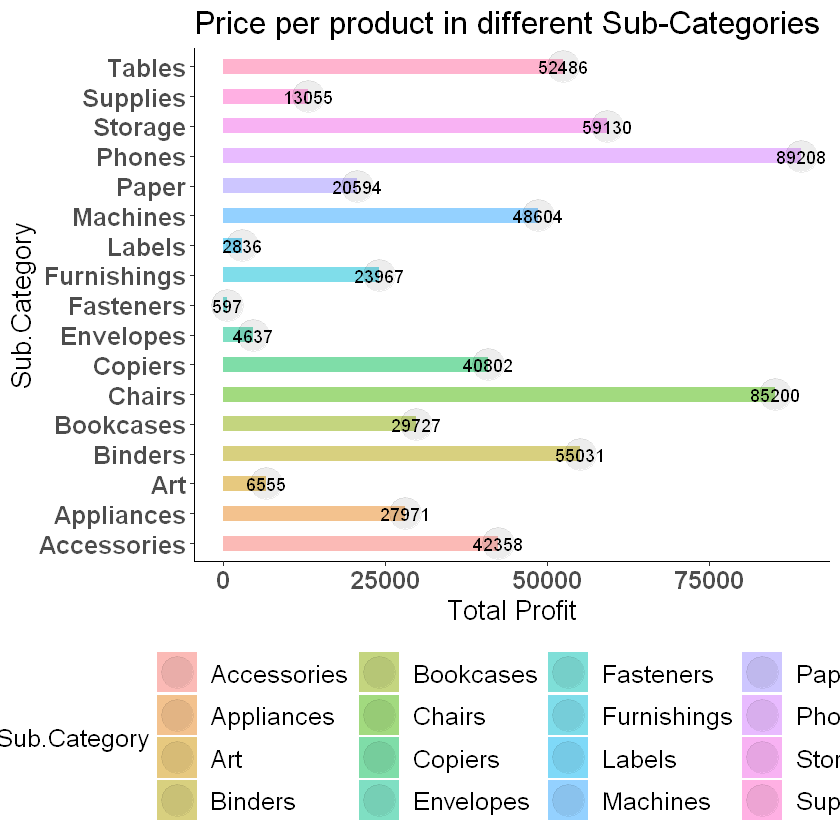

In [54]:
ggplot(product_price, aes(x= Sub.Category,y=Total_Profit,fill= Sub.Category))+
  geom_col(width = 0.5, alpha = 0.5)+
  geom_point(size=9, color="black",alpha=0.07)+
  theme_classic()+
  coord_flip()+
  geom_text(aes(x= Sub.Category,y=Total_Profit,label =Total_Profit))+
  labs(x = "Sub.Category", y = "Total Profit", title = "Price per product in different Sub-Categories")+
  theme(axis.text= element_text(size = 15, face = "bold"), title  =  element_text(size = 16))+
  theme(legend.title = element_text(size=15),legend.text = element_text(size=15),legend.position="bottom")

## Profit per product in different Sub-Categories 

In [55]:
List_new=list()
b=0
for (i in Superstore) {
  b= (Superstore$Profit)/(Superstore$Quantity)
  List_new[[length(List_new)+1]]=b
}
Superstore=Superstore %>% mutate(Profit_per_product=as.integer(paste(b)))

product_profit=Superstore %>%
  group_by(Sub.Category) %>%
  summarise(Total_Product_Profit= sum(Profit_per_product))%>%
  arrange(desc(Total_Product_Profit))
datatable(product_profit)

HTML widgets cannot be represented in plain text (need html)

## Plotting Profit per product in different Sub-Categories 

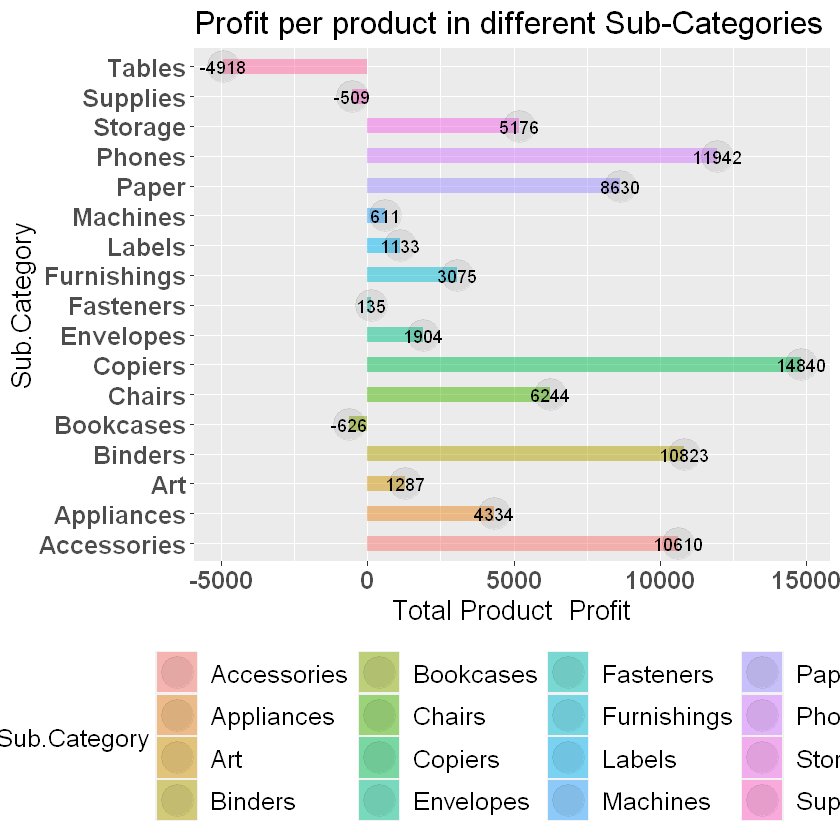

In [56]:
ggplot(product_profit, aes(x= Sub.Category,y=Total_Product_Profit,fill= Sub.Category))+
  geom_col(width = 0.5, alpha = 0.5)+
  geom_point(size=9, color="black",alpha=0.07)+
  coord_flip()+
  geom_text(aes(x= Sub.Category,y=Total_Product_Profit,label =Total_Product_Profit))+
  labs(x = "Sub.Category", y = "Total Product  Profit", title = "Profit per product in different Sub-Categories")+
  theme(axis.text= element_text(size = 15, face = "bold"), title  =  element_text(size = 16))+
  theme(legend.title = element_text(size=15),legend.text = element_text(size=15),legend.position="bottom")

## Observations
1. Price per Product show similar trends with Phones and Chairs topping the chart.
2. Profit per product show similar trends with Copiers and Phones  topping the chart.

# Shipping Models

## Shipping Models for Profit 

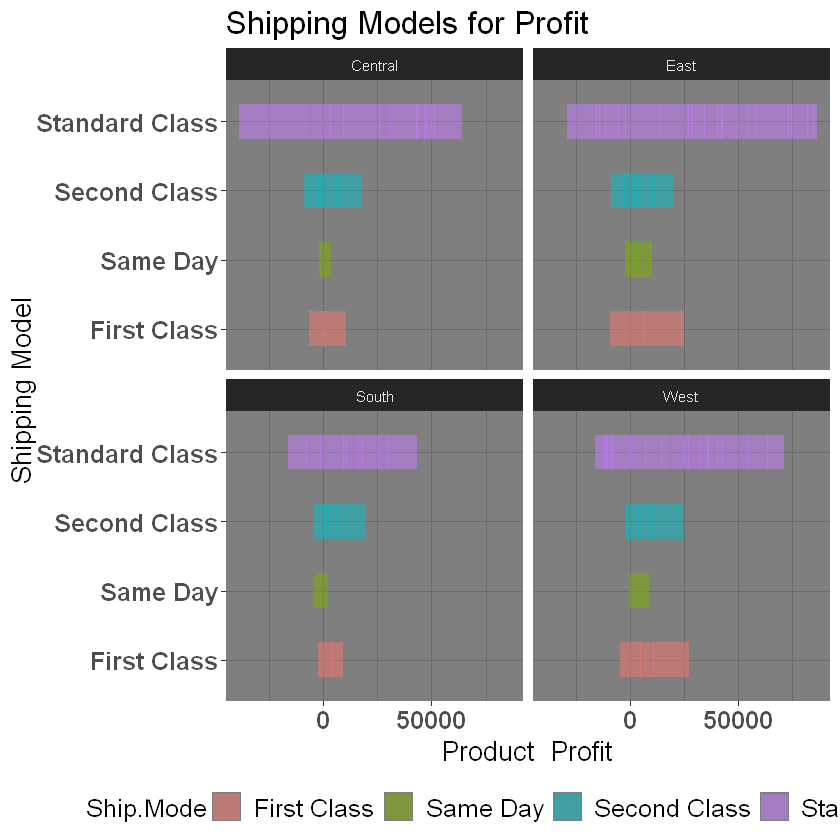

In [58]:
Superstore %>%
  ggplot(aes(x=Ship.Mode,y=Profit,fill= Ship.Mode))+
  geom_col(width = 0.5, alpha = 0.5)+
  facet_wrap(~Region)+
  theme_dark()+
  coord_flip()+
  labs(x = "Shipping Model", y = "Product  Profit", title = "Shipping Models for Profit")+
  theme(axis.text= element_text(size = 15, face = "bold"), title  =  element_text(size = 16))+
  theme(legend.title = element_text(size=15),legend.text = element_text(size=15),legend.position="bottom")

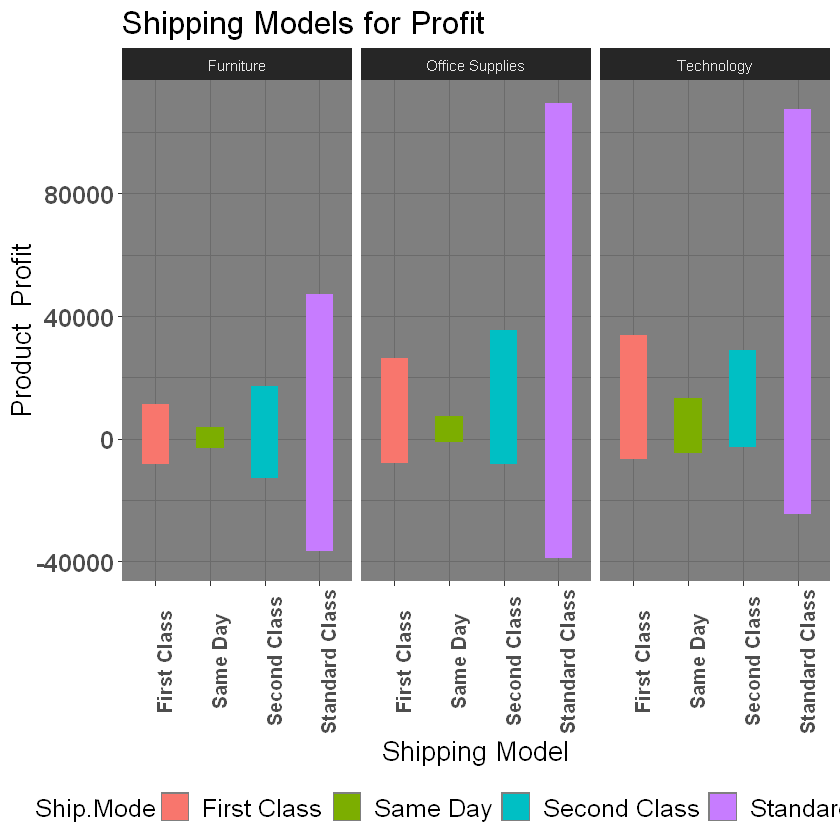

In [59]:
Superstore %>%
  ggplot(aes(x=Ship.Mode,y= Profit,,fill= Ship.Mode))+
  geom_col(width = 0.5)+
  facet_wrap(~Category)+
  theme_dark()+
  labs(x = "Shipping Model", y = "Product  Profit", title = "Shipping Models for Profit")+
  theme(axis.text= element_text(size = 15, face = "bold"), title  =  element_text(size = 16))+
  theme(axis.text.x = element_text(angle = 90 ,size = 12, face = "bold"))+
  theme(legend.title = element_text(size=15),legend.text = element_text(size=15),legend.position="bottom")

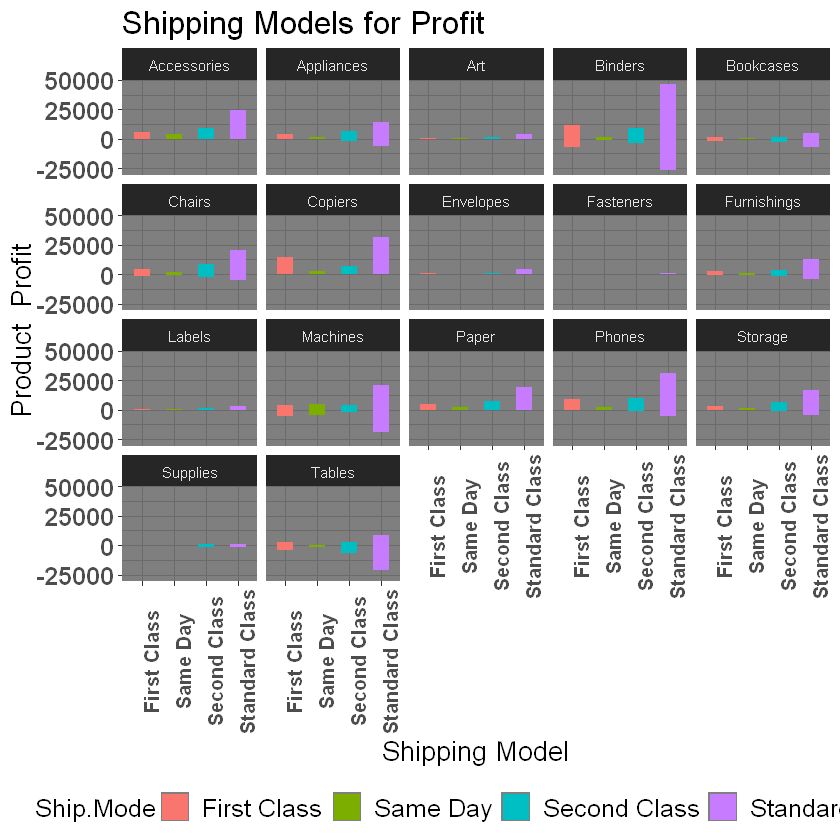

In [60]:
Superstore %>%
  ggplot(aes(x=Ship.Mode,y= Profit,,fill= Ship.Mode))+
  geom_col(width = 0.5)+
  facet_wrap(~Sub.Category)+
  theme_dark()+
  labs(x = "Shipping Model", y = "Product  Profit", title = "Shipping Models for Profit")+
  theme(axis.text= element_text(size = 15, face = "bold"), title  =  element_text(size = 16))+
  theme(axis.text.x = element_text(angle = 90 ,size = 12, face = "bold"))+
  theme(legend.title = element_text(size=15),legend.text = element_text(size=15),legend.position="bottom")

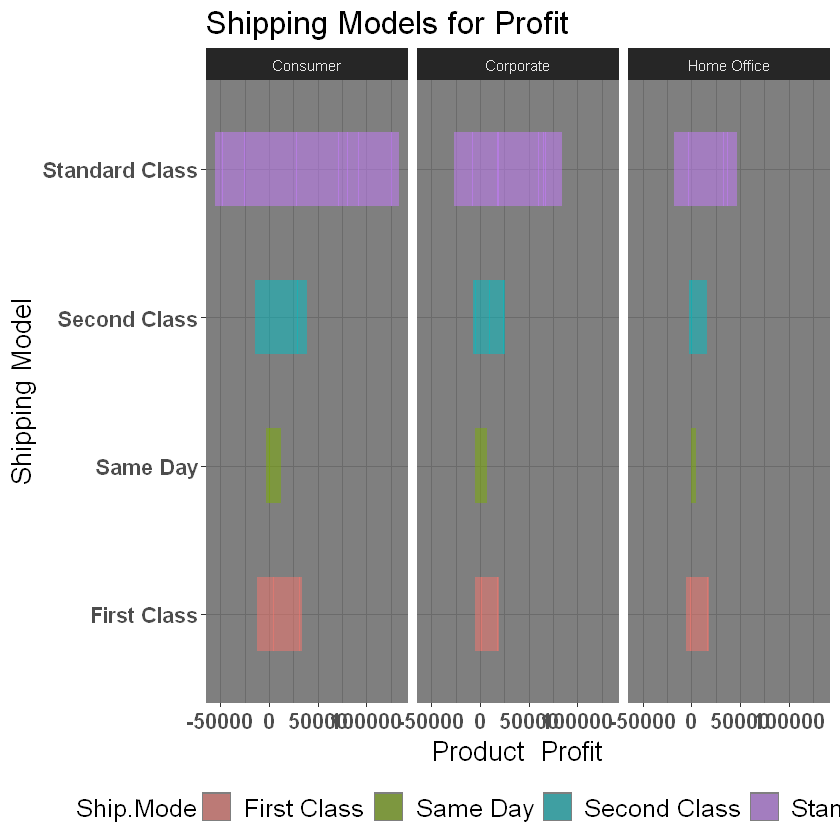

In [63]:
Superstore %>%
  ggplot(aes(x=Ship.Mode,y=Profit,fill= Ship.Mode))+
  geom_col(width = 0.5, alpha = 0.5)+
  facet_wrap(~Segment)+
  theme_dark()+
  coord_flip()+
  labs(x = "Shipping Model", y = "Product  Profit", title = "Shipping Models for Profit")+
  theme(axis.text= element_text(size = 13, face = "bold"), title  =  element_text(size = 16))+
  theme(legend.title = element_text(size=15),legend.text = element_text(size=15),legend.position="bottom")

## Shipping Models for Quantity 

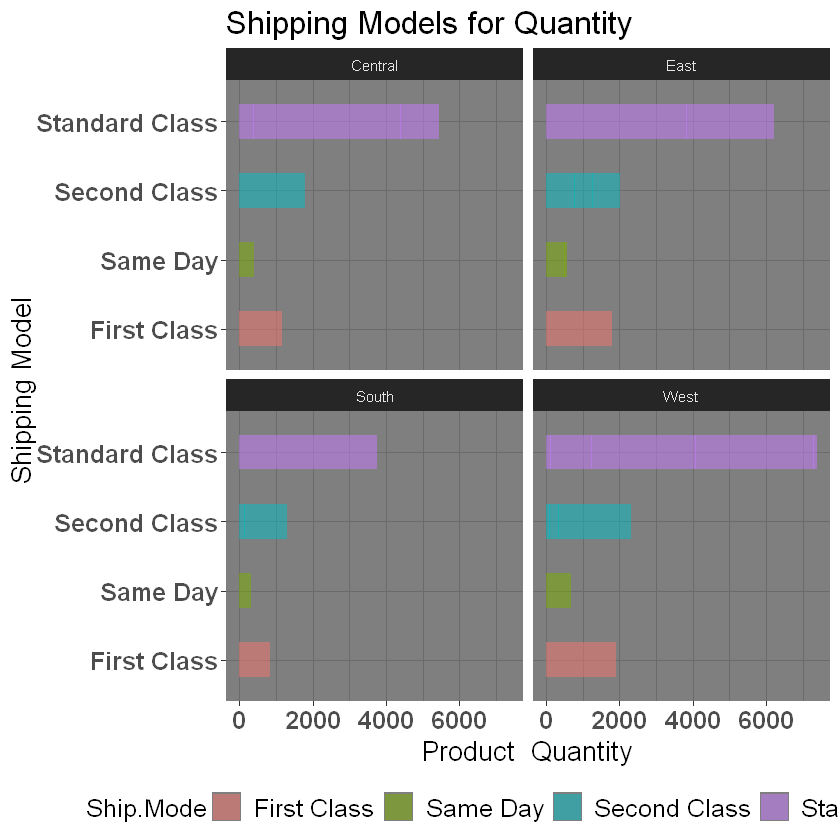

In [64]:
Superstore %>%
  ggplot(aes(x=Ship.Mode,y=Quantity,fill= Ship.Mode))+
  geom_col(width = 0.5, alpha = 0.5)+
  facet_wrap(~Region)+
  theme_dark()+
  coord_flip()+
  labs(x = "Shipping Model", y = "Product  Quantity", title = "Shipping Models for Quantity")+
  theme(axis.text= element_text(size = 15, face = "bold"), title  =  element_text(size = 16))+
  theme(legend.title = element_text(size=15),legend.text = element_text(size=15),legend.position="bottom")

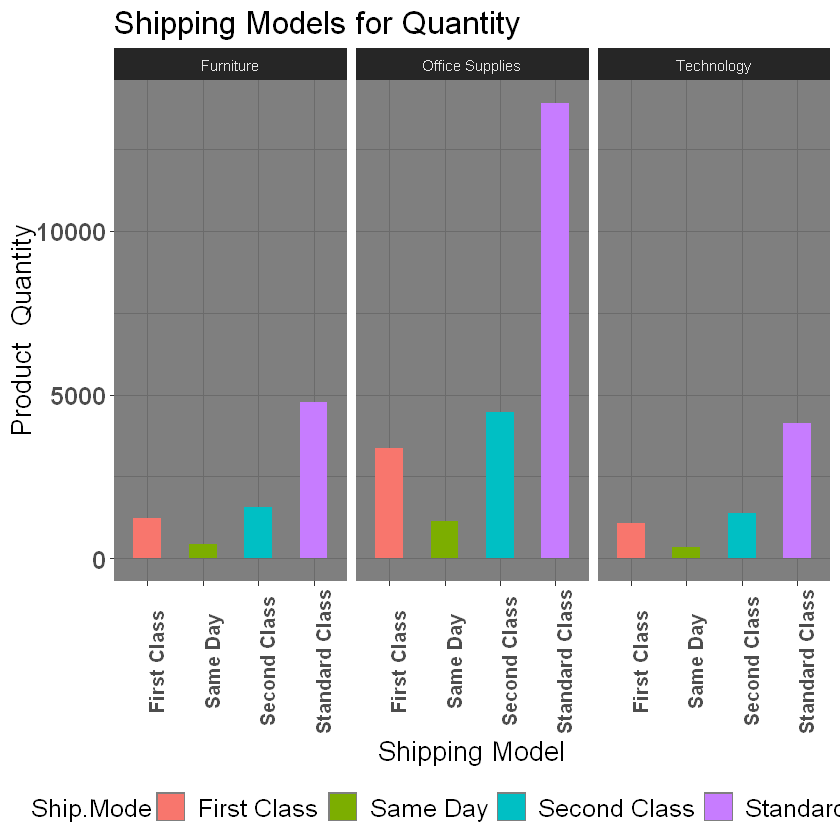

In [66]:
Superstore %>%
  ggplot(aes(x=Ship.Mode,y=Quantity,,fill= Ship.Mode))+
  geom_col(width = 0.5)+
  facet_wrap(~Category)+
  theme_dark()+
  labs(x = "Shipping Model", y = "Product  Quantity", title = "Shipping Models for Quantity")+
  theme(axis.text= element_text(size = 15, face = "bold"), title  =  element_text(size = 16))+
  theme(axis.text.x = element_text(angle = 90 ,size = 12, face = "bold"))+
  theme(legend.title = element_text(size=15),legend.text = element_text(size=15),legend.position="bottom")

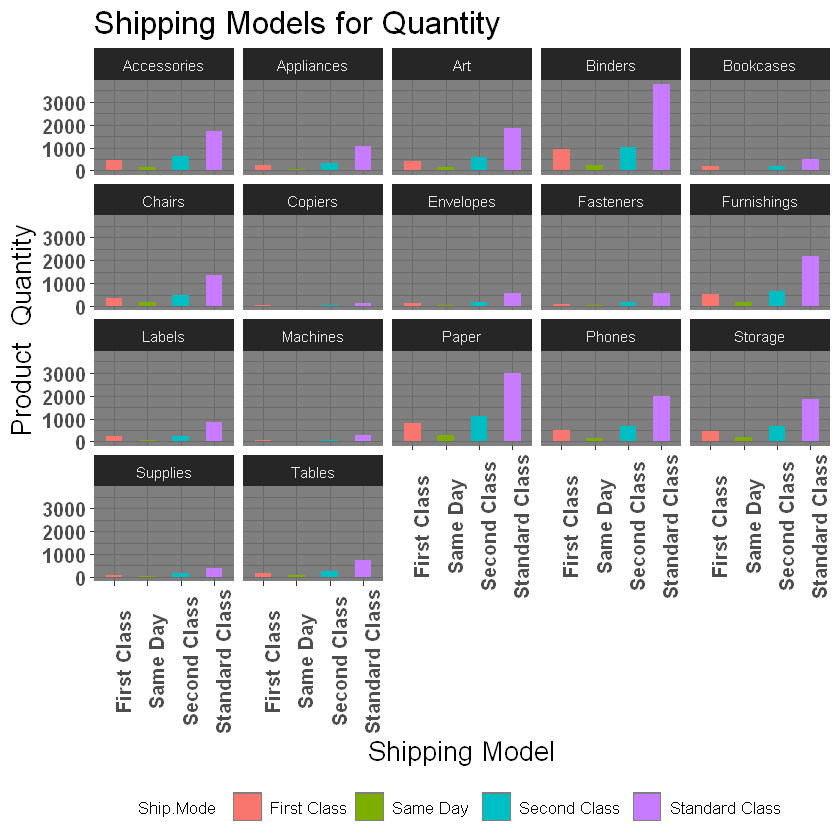

In [63]:
Superstore %>%
  ggplot(aes(x=Ship.Mode,y=Quantity,,fill= Ship.Mode))+
  geom_col(width = 0.5)+
  facet_wrap(~Sub.Category)+
  theme_dark()+
  labs(x = "Shipping Model", y = "Product  Quantity", title = "Shipping Models for Quantity")+
  theme(axis.text= element_text(size = 12, face = "bold"), title  =  element_text(size = 16))+
  theme(axis.text.x = element_text(angle = 90 ,size = 12, face = "bold"))+
  theme(legend.title = element_text(size=10),legend.text = element_text(size=10),legend.position="bottom")

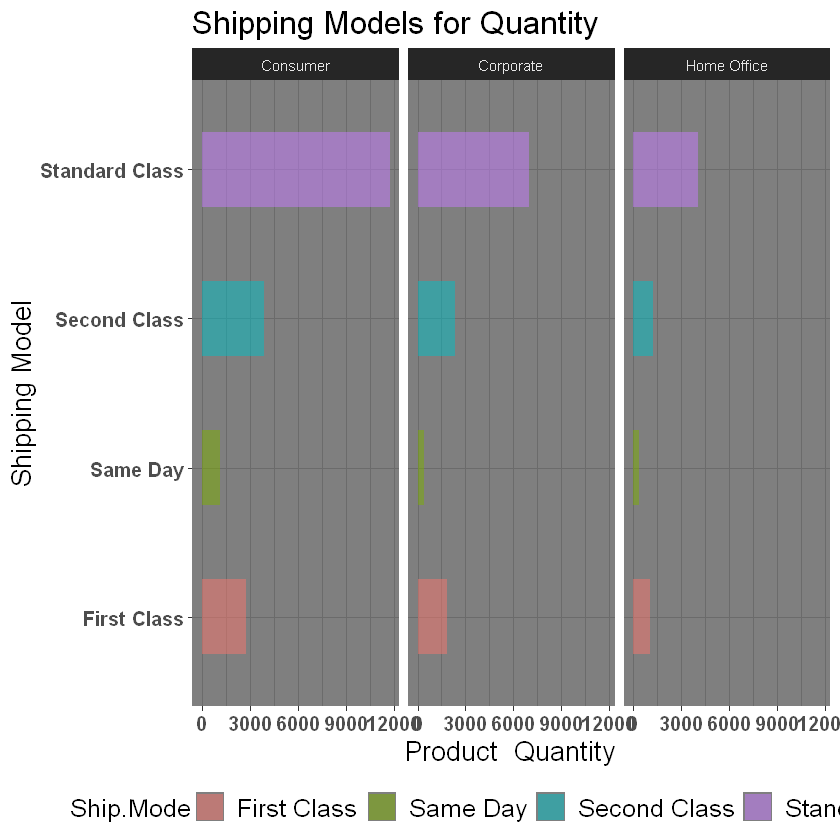

In [69]:
Superstore %>%
  ggplot(aes(x=Ship.Mode,y=Quantity,fill= Ship.Mode))+
  geom_col(width = 0.5, alpha = 0.5)+
  facet_wrap(~Segment)+
  theme_dark()+
  coord_flip()+
  labs(x = "Shipping Model", y = "Product  Quantity", title = "Shipping Models for Quantity")+
  theme(axis.text= element_text(size = 12, face = "bold"), title  =  element_text(size = 16))+
  theme(legend.title = element_text(size=15),legend.text = element_text(size=15),legend.position="bottom")

## Shipping Models for Sales 

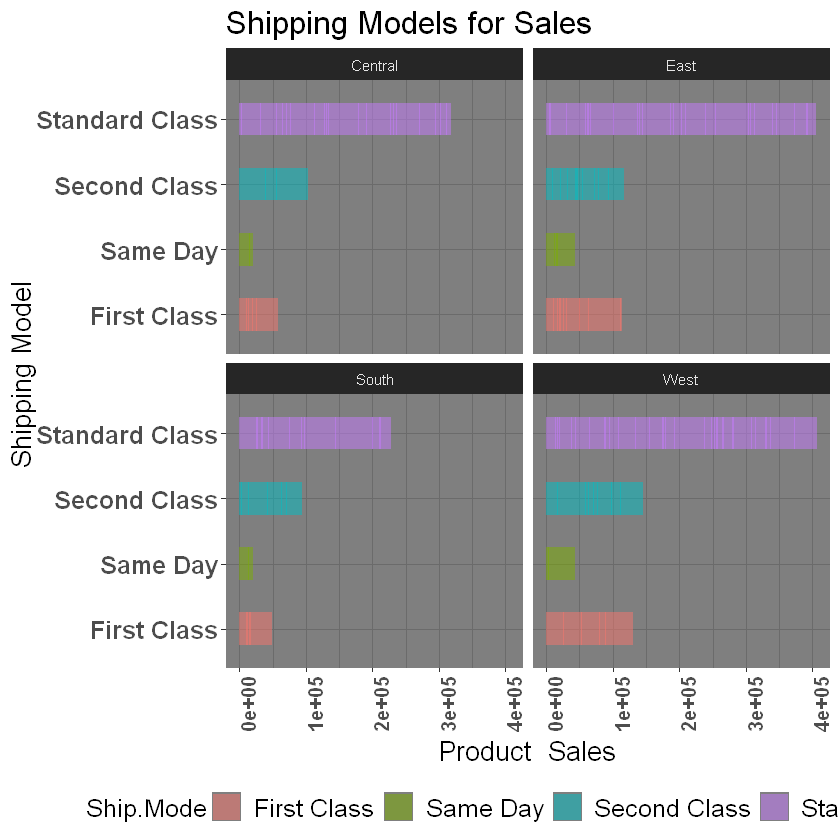

In [70]:
Superstore %>%
  ggplot(aes(x=Ship.Mode,y=Sales,fill= Ship.Mode))+
  geom_col(width = 0.5, alpha = 0.5)+
  facet_wrap(~Region)+
  theme_dark()+
  coord_flip()+
  labs(x = "Shipping Model", y = "Product  Sales", title = "Shipping Models for Sales")+
  theme(axis.text= element_text(size = 15, face = "bold"), title  =  element_text(size = 16))+
  theme(axis.text.x = element_text(angle = 90 ,size = 12, face = "bold"))+
  theme(legend.title = element_text(size=15),legend.text = element_text(size=15),legend.position="bottom")

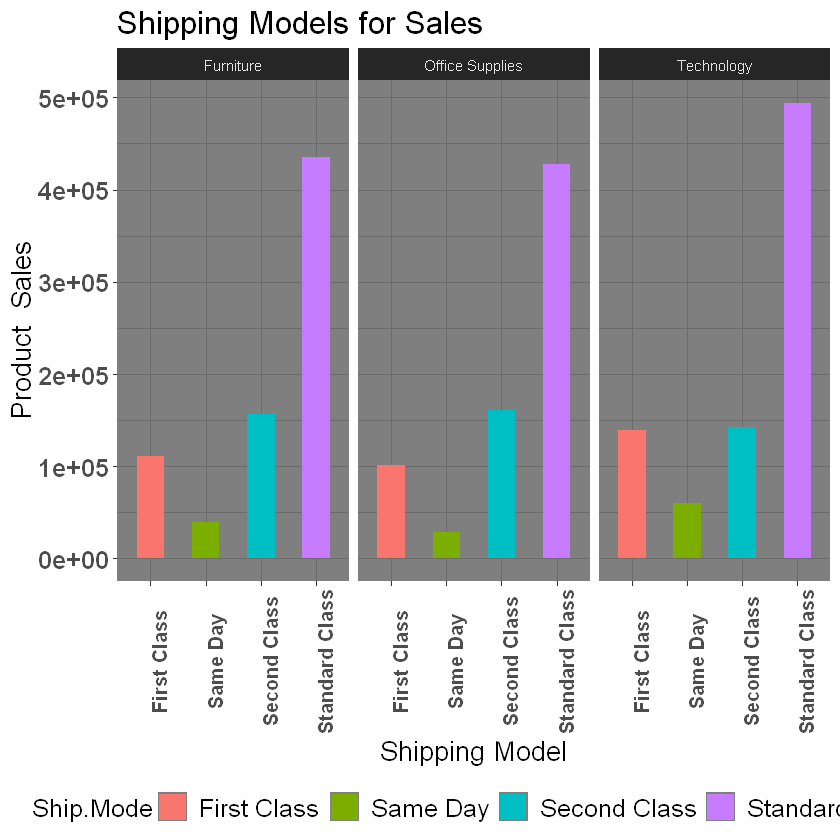

In [71]:
Superstore %>%
  ggplot(aes(x=Ship.Mode,y=Sales,,fill= Ship.Mode))+
  geom_col(width = 0.5)+
  facet_wrap(~Category)+
  theme_dark()+
  labs(x = "Shipping Model", y = "Product  Sales", title = "Shipping Models for Sales")+
  theme(axis.text= element_text(size = 15, face = "bold"), title  =  element_text(size = 16))+
  theme(axis.text.x = element_text(angle = 90 ,size = 12, face = "bold"))+
  theme(legend.title = element_text(size=15),legend.text = element_text(size=15),legend.position="bottom")

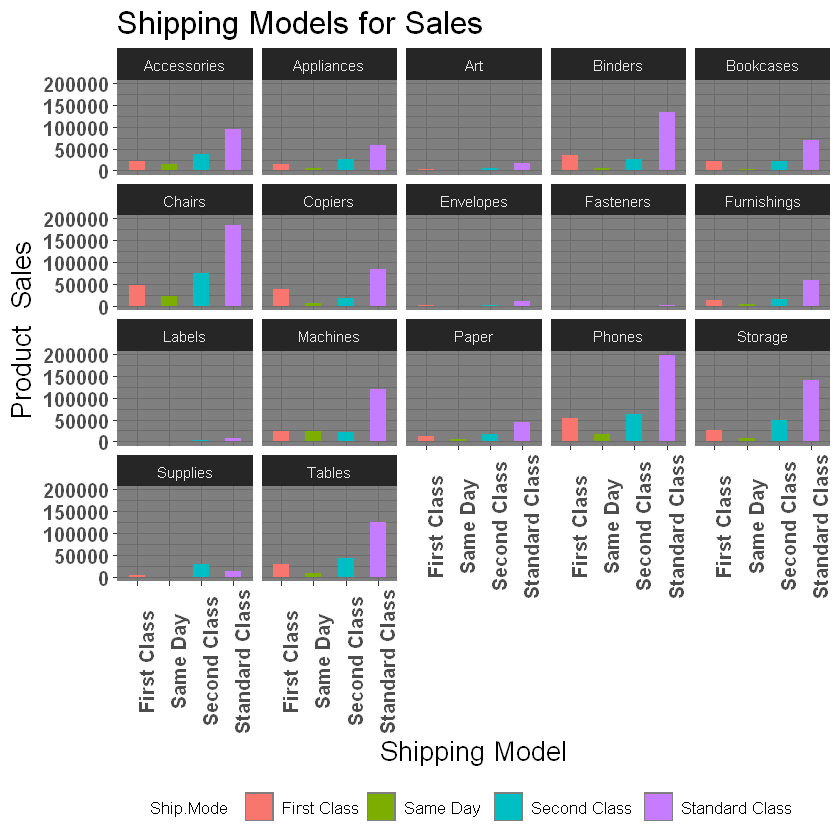

In [72]:
Superstore %>%
  ggplot(aes(x=Ship.Mode,y=Sales,,fill= Ship.Mode))+
  geom_col(width = 0.5)+
  facet_wrap(~Sub.Category)+
  theme_dark()+
  labs(x = "Shipping Model", y = "Product  Sales", title = "Shipping Models for Sales")+
  theme(axis.text= element_text(size = 12, face = "bold"), title  =  element_text(size = 16))+
  theme(axis.text.x = element_text(angle = 90 ,size = 12, face = "bold"))+
  theme(legend.title = element_text(size=10),legend.text = element_text(size=10),legend.position="bottom")

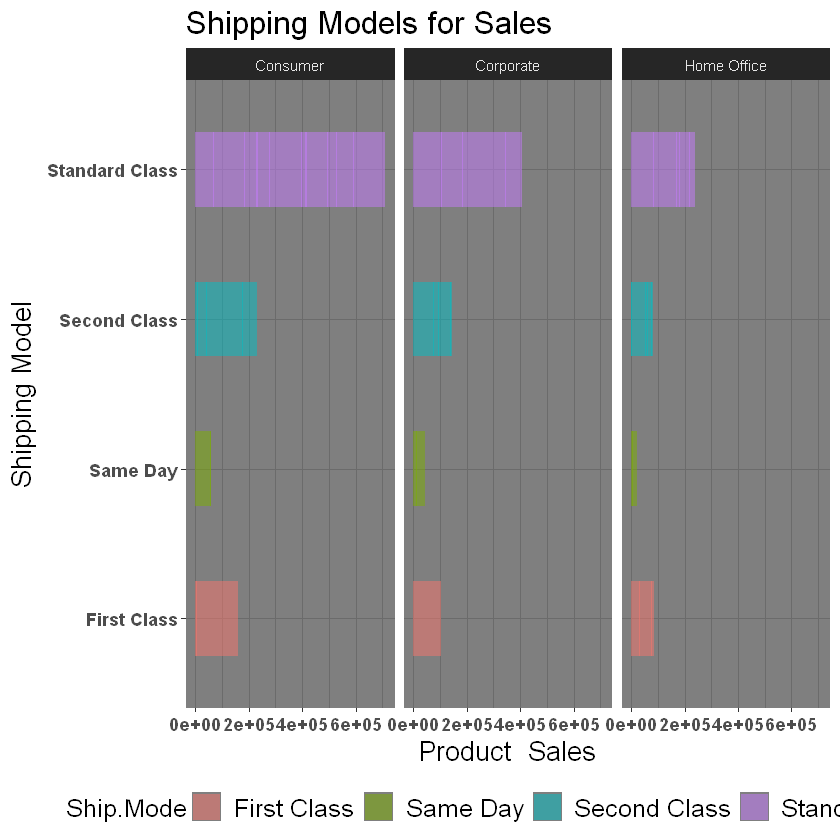

In [74]:
Superstore %>%
  ggplot(aes(x=Ship.Mode,y=Sales,fill= Ship.Mode))+
  geom_col(width = 0.5, alpha = 0.5)+
  facet_wrap(~Segment)+
  theme_dark()+
  coord_flip()+
  labs(x = "Shipping Model", y = "Product  Sales", title = "Shipping Models for Sales")+
  theme(axis.text= element_text(size = 11, face = "bold"), title  =  element_text(size = 16))+
  theme(legend.title = element_text(size=15),legend.text = element_text(size=15),legend.position="bottom")

## Observations
1. Standard Class is the most used shipping method among all consumer segments.
2. Office Supplies are the most bought products and Consumer segment is the largest Segment among the three.

## Sales and Profits with and without discount  

In [75]:
Superstore$DiscountedPrice= Superstore$Sales- (Superstore$Sales*Superstore$Discount)
Superstore$Sales_Quantity= Superstore$Sales/Superstore$Quantity
Superstore$DP_Quantity= Superstore$DiscountedPrice/Superstore$Quantity
head(Superstore)

Ship.Mode      Segment   Country       City            State      Postal.Code
1 Second Class   Consumer  United States Henderson       Kentucky   42420      
2 Second Class   Consumer  United States Henderson       Kentucky   42420      
3 Second Class   Corporate United States Los Angeles     California 90036      
4 Standard Class Consumer  United States Fort Lauderdale Florida    33311      
5 Standard Class Consumer  United States Fort Lauderdale Florida    33311      
6 Standard Class Consumer  United States Los Angeles     California 90032      
  Region Category        Sub.Category Sales    Quantity Discount Profit   
1 South  Furniture       Bookcases    261.9600 2        0.00       41.9136
2 South  Furniture       Chairs       731.9400 3        0.00      219.5820
3 West   Office Supplies Labels        14.6200 2        0.00        6.8714
4 South  Furniture       Tables       957.5775 5        0.45     -383.0310
5 South  Office Supplies Storage       22.3680 2        0.20        2.5164
6 West   Furniture       Furnishings   48.8600 7        0.00       14.1694
  Price_per_product Profit_per_product DiscountedPrice Sales_Quantity
1 130                20                261.9600        130.9800      
2 243                73                731.9400        243.9800      
3   7                 3                 14.6200          7.3100      
4 191               -76                526.6676        191.5155      
5  11                 1                 17.8944         11.1840      
6   6                 2                 48.8600          6.9800      
  DP_Quantity
1 130.9800   
2 243.9800   
3   7.3100   
4 105.3335   
5   8.9472   
6   6.9800

In [76]:
No_Discount=Superstore%>% 
  filter(Discount==0.00) %>%
  summarise(Total_Quantity= sum(Quantity)) 
datatable(No_Discount)

HTML widgets cannot be represented in plain text (need html)

In [77]:
Discount=Superstore%>% 
  filter(Discount!=0.00) %>%
  summarise(Total_Quantity= sum(Quantity)) 
datatable(Discount)

HTML widgets cannot be represented in plain text (need html)

In [78]:
Total_Quantity=Discount- No_Discount
datatable(Total_Quantity)

HTML widgets cannot be represented in plain text (need html)

## Observations
Considering sales across different categories, with and without discount,there is more sales taking place in the case with Discount.